In [1]:
!pip install geopy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

pd.set_option('display.max_columns', None)

In [3]:
la = pd.read_csv('listings LA.csv')
nyc = pd.read_csv('listings NYC.csv')

In [4]:
la.head(2)

last_scraped                                           name  \
0   2025-09-02  Blueground | W. Hollywood, nr shops & melrose   
1   2025-09-02   Bright Open Space Near Beach, Marina and LAX   

                                         description  \
0  Show up and start living from day one in Los A...   
1  Welcome to this light-filled private guest hou...   

                               neighborhood_overview   host_name  host_since  \
0  This furnished apartment is located in Melrose...  Blueground  2016-12-16   
1                                                NaN   Veronique  2014-03-19   

                                          host_about host_response_time  \
0  We’re Blueground, a global proptech company wi...     within an hour   
1  As a former flight attendant with nearly 15 ye...     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                  97%                 f   
1               100%                 100%                 t   

   host_listings_count  host_total_listings_count  \
0               4988.0                     5760.0   
1                  4.0                       12.0   

                 host_verifications host_has_profile_pic   latitude  \
0  ['email', 'phone', 'work_email']                    t  34.088548   
1                ['email', 'phone']                    t  33.989461   

    longitude       property_type        room_type  accommodates  bathrooms  \
0 -118.374914  Entire rental unit  Entire home/apt             2        1.0   
1 -118.429896   Entire guesthouse  Entire home/apt             2        1.0   

  bathrooms_text  bedrooms  beds  \
0         1 bath       1.0   1.0   
1         1 bath       0.0   1.0   

                                           amenities    price  minimum_nights  \
0  ["Self check-in", "Iron", "Long term stays all...  $165.00              31   
1  ["Hot water kettle", "Coffee", "Dishes and sil...  $142.00               2   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    31.0                    31.0   
1             365                     1.0                     2.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    31.0   
1                   365.0                   365.0                     2.0   

   maximum_nights_avg_ntm  estimated_occupancy_l365d first_review last_review  \
0                  1125.0                          0          NaN         NaN   
1                   365.0                        126   2024-05-12  2025-08-24   

  instant_bookable  review_scores_rating  
0                t                   NaN  
1                f                   5.0

In [5]:
la.shape

(45886, 39)

In [6]:
la.columns

Index(['last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_name', 'host_since', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'estimated_occupancy_l365d', 'first_review',
       'last_review', 'instant_bookable', 'review_scores_rating'],
      dtype='object')

In [7]:
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45886 entries, 0 to 45885
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_scraped               45886 non-null  object 
 1   name                       45885 non-null  object 
 2   description                44917 non-null  object 
 3   neighborhood_overview      19936 non-null  object 
 4   host_name                  45863 non-null  object 
 5   host_since                 45862 non-null  object 
 6   host_about                 25405 non-null  object 
 7   host_response_time         35581 non-null  object 
 8   host_response_rate         35581 non-null  object 
 9   host_acceptance_rate       35887 non-null  object 
 10  host_is_superhost          44124 non-null  object 
 11  host_listings_count        45862 non-null  float64
 12  host_total_listings_count  45862 non-null  float64
 13  host_verifications         45862 non-null  obj

In [8]:
# checking for missing values
# Fraction of missing values per column
la_missing_frac = la.isna().mean()

# Keep only columns with missing values
la_missing_frac = la_missing_frac[la_missing_frac > 0].sort_values(ascending=False)

la_missing_frac

neighborhood_overview        0.565532
host_about                   0.446345
first_review                 0.272436
last_review                  0.272436
review_scores_rating         0.272436
host_response_rate           0.224578
host_response_time           0.224578
host_acceptance_rate         0.217910
price                        0.197598
beds                         0.196814
bathrooms                    0.195768
bedrooms                     0.066229
host_is_superhost            0.038400
description                  0.021118
bathrooms_text               0.002397
host_listings_count          0.000523
host_since                   0.000523
host_total_listings_count    0.000523
host_verifications           0.000523
host_has_profile_pic         0.000523
host_name                    0.000501
minimum_maximum_nights       0.000196
minimum_minimum_nights       0.000196
maximum_minimum_nights       0.000196
maximum_maximum_nights       0.000196
name                         0.000022
dtype: float64

In [9]:
# Fraction of missing values per column
nyc_missing_frac = nyc.isna().mean()

# Keep only columns with missing values
nyc_missing_frac = nyc_missing_frac[nyc_missing_frac > 0].sort_values(ascending=False)

nyc_missing_frac

neighborhood_overview        0.482041
host_about                   0.456814
host_response_rate           0.436820
host_response_time           0.436820
host_acceptance_rate         0.431863
price                        0.409377
beds                         0.400654
bathrooms                    0.399075
review_scores_rating         0.309822
first_review                 0.309822
last_review                  0.309822
bedrooms                     0.164742
host_verifications           0.032317
host_listings_count          0.032317
host_since                   0.032317
host_total_listings_count    0.032317
host_has_profile_pic         0.032317
host_name                    0.032289
description                  0.026529
host_is_superhost            0.010634
bathrooms_text               0.003157
minimum_maximum_nights       0.000332
minimum_minimum_nights       0.000332
maximum_minimum_nights       0.000332
maximum_maximum_nights       0.000332
name                         0.000055
dtype: float64

## Data Cleaning and integrity check

Just from initial exploration of data we discovered that:
- `Price` columns/variable is not in correct numeric format
- Certain columns (`last_scraped`, `host_since`, `first_review`, `last_review`) which were suppose to be in datetime format are not in correct format
- `host_response_rate`, `host_acceptance_rate` are not in analysis friendly format, better to convert them in numeric type for convinence
- `instant_bookable`, `host_has_profile_pic`, `host_is_superhost` are boolean with 't', 'f' values, so replacing them with 1, 0 for better training of the model

In [10]:
import ast
# Helper functions for data inconsistency

def remove_duplicates(df):
    """
    Cleans the dataset by removing identical rows and reporting the reduction size.
    """
    before = len(df)
    df = df.drop_duplicates()
    after = len(df)
    print(f"Removed {before - after} duplicate rows")
    return df

def convert_to_datetime(df, cols):
    """
    Convert specified columns to datetime.
    Invalid parsing will be set to NaT.
    """
    df = df.copy()
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

def convert_percent_to_numeric(df, cols):
    """
    Convert percentage string columns (e.g. '95%') to numeric (95).
    """
    df = df.copy()
    for col in cols:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.replace('%', '', regex=False)
                .pipe(pd.to_numeric, errors='coerce')
            )
    return df

def convert_tf_to_binary(df, cols):
    """
    Convert 't'/'f', True/False, or mixed boolean columns to 1/0.
    """
    df = df.copy()
    mapping = {'t': 1, 'f': 0, True: 1, False: 0}
    for col in cols:
        if col in df.columns:
            df[col] = (
                df[col]
                .map(mapping)
                .astype(float)
            )
    return df

def convert_currency_to_numeric(df, col, symbols=r'[\$,]'):
    """
    Convert currency-like string column (e.g. '$1,234') to numeric.
    """
    df = df.copy()

    if col in df.columns:
        df[col] = (
            df[col]
            .replace(symbols, '', regex=True)
            .pipe(pd.to_numeric, errors='coerce')
        )

    return df

def add_distance_to_center(
    df,
    center_coords,
    new_col='dist_to_center_km'
):
    """
    Add distance (km) from a given city center using geodesic distance.
    """
    df = df.copy()

    df[new_col] = df.apply(
        lambda row: geodesic(
            (row['latitude'], row['longitude']),
            center_coords
        ).km
        if pd.notnull(row['latitude']) and pd.notnull(row['longitude'])
        else None,
        axis=1
    )

    return df
def convert_text_to_count_word(df,col_name:str):
    """
    Counts the number of words in a string or a pandas Series.

    Args:
        text_input: A string or a pandas Series.

    Returns:
        An integer (if input is a string) or a pandas Series of integers (if input is a Series)
        representing the word count. Returns 0 for 'no description' and NaN for non-string values.
    """
    df=df.copy()
    text_input = df[col_name]
    if isinstance(text_input, str):
        if text_input.lower() == 'no description':
            return 0
        df[col_name+"_wordcount"]=len(text_input.split())
    elif isinstance(text_input, pd.Series):
        # Fill NaN with empty string, replace 'no description' with empty string, then split and count
        df[col_name+"_wordcount"]=text_input.fillna('').astype(str).str.replace('no description', '', case=False).str.split().str.len()
    return df

def convert_responsetime_to_numeric(df):
    """
    Transforms categorical response time descriptions into an ordinal numeric scale.

    This function maps qualitative text (e.g., "within an hour") to a quantitative
    ranking from 1 to 5, where higher values represent faster response speeds.
    It normalizes input strings by stripping whitespace and converting to lowercase
    to ensure matching consistency. Any missing or unrecognized values are
    filled with 0 to maintain a numerical baseline for machine learning models.
    """
    df=df.copy()
    response_time_mapping = {
      'within a few minutes': 5,
      'within an hour': 4,
      'within a few hours': 3,
      'within a day': 2,
      'a few days or more': 1
  }
    df['host_response_time_cleaned'] = df['host_response_time'].astype(str).str.strip().str.lower()
    df['host_response_time_numeric'] = df['host_response_time_cleaned'].map(response_time_mapping).fillna(0).astype(int)
    df=df.drop(columns=['host_response_time_cleaned'])
    return df

def convert_list_to_count(df,col_name):
    """
    Quantifies list-like string data by calculating the number of elements in each entry.

    Many datasets store collections (like amenities or verifications) as string-encoded
    lists (e.g., "['email', 'phone']"). This function safely parses those strings
    using `ast.literal_eval` and returns the count of items. It handles missing values
    or non-string data by returning a count of 0, effectively converting a complex
    metadata column into a simple numerical feature.
    """
    df=df.copy()
    # Create a new column to store verification counts
    new_col_name = col_name + '_count'
    df[new_col_name] = df[col_name].apply(
        lambda x: len(ast.literal_eval(x)) if pd.notna(x) and isinstance(x, str) else 0
    )
    return df

In [11]:
# Helper functions for integrity checks

def handle_reviews(df):
    """
    Generates a binary indicator representing the presence of user reviews.

    This function treats missing review scores as a distinct feature rather than
    just 'missing data.' It creates a 'has_reviews' flag (1 for reviewed, 0 for
    unreviewed), allowing a model to learn if the mere existence of reviews
    correlates with the target variable, regardless of the actual score.
    """
    df = df.copy()

    df["has_reviews"] = df["review_scores_rating"].notna().astype(int)

    return df

def handle_host_response_info(df):
    """
    Creates a composite availability flag for host communication data.

    This identifies if a host has provided any responsiveness metadata. By
    checking both response rate and response time, the function creates a single
    binary feature (1 if either is available, 0 if both are missing). This is
    useful for identifying 'active' vs. 'passive' host profiles in the dataset.
    """
    df = df.copy()

    df["host_response_info_available"] = (
        df["host_response_rate"].notna() |
        df["host_response_time"].notna()
    ).astype(int)

    return df

def flag_price_integrity(df, upper_limit=2000, lower_limit=1):
    """
    Annotates pricing data based on presence and realistic value ranges.

    This function implements a tri-state classification system to help identify
    unreliable price points:
      -  0: Valid (Price falls within the specified limits).
      - -1: Missing (The price value is Null).
      -  1: Outlier (Price exists but is outside the realistic bounds).

    This allows the pipeline to keep all rows while giving the model a way to
    weight or ignore 'integrity-flagged' records.
    """
    df = df.copy()

    df["price_integrity_flag"] = 0  # default: valid

    # Missing values → -1
    df.loc[df["price"].isna(), "price_integrity_flag"] = -1

    # Present but invalid values → 1
    df.loc[
        df["price"].notna() &
        ((df["price"] < lower_limit) | (df["price"] > upper_limit)),
        "price_integrity_flag"
    ] = 1

    return df

def flag_capacity_issues(df):
    """
    Identifies logical inconsistencies in listing capacity and room counts.

    This function checks for 'impossible' scenarios that suggest data entry
    errors, such as having more beds/bedrooms than the total number of people
    the listing can accommodate, or listings with zero or negative bathrooms.
    It logs the total number of flagged inconsistencies to the console for
    quality monitoring.
    """
    df = df.copy()

    df["capacity_issue"] = (
        (df["beds"] > df["accommodates"]) |
        (df["bedrooms"] > df["accommodates"]) |
        (df["bathrooms"] <= 0)
    )
    print(f"Flagged {df['capacity_issue'].sum()} capacity inconsistencies")
    return df

def clean_night_constraints(df):
    """
    Filters out records with contradictory or negative booking duration rules.

    This removes rows where the minimum stay requirement is strictly greater
    than the maximum stay allowed, or where night counts are negative. These
    rows are considered 'junk' data that could lead to erroneous predictions
    regarding availability or revenue.
    """
    df = df.copy()

    invalid_nights = (
        (df["minimum_nights"] > df["maximum_nights"]) |
        (df["minimum_nights"] < 0) |
        (df["maximum_nights"] < 0)
    )

    print(f"Removing {invalid_nights.sum()} rows with invalid night constraints")
    df = df.loc[~invalid_nights]

    return df

def clean_dates(df):
    """
    Enforces chronological consistency across temporal features.

    This function removes records that violate natural time sequences, specifically:
      1. Listings 'born' after they were scraped (host_since > last_scraped).
      2. Reviews appearing before the first review date (first_review > last_review).

    Ensuring chronological integrity is vital for any time-series analysis or
    longitudinal study of host behavior.
    """
    df = df.copy()

    invalid_dates = (
        (df["host_since"] > df["last_scraped"]) |
        (df["first_review"] > df["last_review"])
    )

    print(f"Removing {invalid_dates.sum()} rows with invalid dates")
    df = df.loc[~invalid_dates]

    return df

def handle_bathrooms_privacy(df):
    """
    Adds 'bathroom_privacy' and 'is_private_bathroom' columns based on 'bathrooms_text'.
    """
    df = df.copy()

    # Convert to string and handle NaN for string operations
    text_series = df['bathrooms_text'].astype(str).str.lower()

    # Determine bathroom privacy type
    df['bathroom_privacy'] = np.nan
    df.loc[text_series.str.contains('private', na=False), 'bathroom_privacy'] = 'Private'
    df.loc[text_series.str.contains('shared', na=False), 'bathroom_privacy'] = 'Shared'

    # Create binary indicator: 1 for Private/Unspecified, 0 for Shared
    # Default to 1 (Private/Unspecified) if neither 'private' nor 'shared' is found
    df['is_private_bathroom'] = 1
    df.loc[df['bathroom_privacy'] == 'Shared', 'is_private_bathroom'] = 0
    df=df.drop(columns='bathroom_privacy')
    return df

def fill_bathrooms_from_text(df):
    import re
    """
    Converts 'bathrooms_text' column to numeric 'bathrooms'.
    Handles 'Half-bath' and extracts numbers from strings.
    """
    df = df.copy()
    if 'bathrooms_text' in df.columns:
        # Create a temporary column for processing, ensuring it's string type
        temp_bathrooms_text = df['bathrooms_text'].astype(str)

        # Replace variations of 'half-bath' with '0.5' to prepare for numeric extraction.
        # Use regex=True and re.IGNORECASE to match case-insensitively.
        temp_bathrooms_text = temp_bathrooms_text.str.replace(r'half-bath', '0.5', regex=True, flags=re.IGNORECASE)

        # Extract any numeric values (integers or decimals) from the processed text.
        df['bathrooms_numeric'] = temp_bathrooms_text.str.extract(r'(\d+\.?\d*)').astype(float)

        # Fill missing values in the original 'bathrooms' column using the newly extracted numeric values,
        # but only where 'bathrooms' is currently NaN and 'bathrooms_numeric' has a value.
        df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms_numeric'])

        # Drop the temporary 'bathrooms_numeric' column as it's no longer needed.
        df = df.drop(columns=['bathrooms_numeric'])
    return df

In [12]:
LA_CITY_CENTER = (34.0549, -118.2426) # City center for LA
NYC_CITY_CENTER = (40.7128, -74.0060) # City center for NYC

date_cols = [
    "last_scraped",
    "host_since",
    "first_review",
    "last_review"
]

percent_cols = [
    "host_response_rate",
    "host_acceptance_rate"
]

binary_cols = [
    "host_is_superhost",
    "host_has_profile_pic",
    "instant_bookable",
    "capacity_issue"
]

In [13]:
def full_preprocess_pipeline(df, city_center):
    """
    Applies cleaning, type normalization, and integrity checks.
    """
    df = df.copy()

    # ---------- BASIC CLEANING ----------
    df = remove_duplicates(df)

    df = convert_to_datetime(df, date_cols)
    df = convert_percent_to_numeric(df, percent_cols)
    df = convert_currency_to_numeric(df, "price")
    df = convert_responsetime_to_numeric(df)
    # ---------- FEATURE ENGINEERING ----------
    df = add_distance_to_center(df, city_center)

    # ---------- INTEGRITY FLAGS ----------
    df = handle_reviews(df)
    df = handle_host_response_info(df)
    df = flag_price_integrity(df)
    df = flag_capacity_issues(df)



    # ---------- HARD CONSTRAINT CLEANING ----------
    df = clean_night_constraints(df)
    df = clean_dates(df)

    df=handle_bathrooms_privacy(df)
    df=fill_bathrooms_from_text(df)

    df=convert_text_to_count_word(df,'description')
    df=convert_text_to_count_word(df,'host_about')
    df=convert_text_to_count_word(df,'neighborhood_overview')
    df=convert_text_to_count_word(df,'name')
    df=convert_list_to_count(df,'host_verifications')
    df=convert_list_to_count(df,'amenities')
    df=convert_responsetime_to_numeric(df)
    df = convert_tf_to_binary(df, binary_cols)

    return df

In [14]:
la_clean = full_preprocess_pipeline(la, LA_CITY_CENTER)
nyc_clean = full_preprocess_pipeline(nyc, NYC_CITY_CENTER)

Removed 5 duplicate rows
Flagged 864 capacity inconsistencies
Removing 1 rows with invalid night constraints
Removing 0 rows with invalid dates


/tmp/ipython-input-451391510.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Private' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[text_series.str.contains('private', na=False), 'bathroom_privacy'] = 'Private'


Removed 45 duplicate rows
Flagged 1678 capacity inconsistencies
Removing 1 rows with invalid night constraints
Removing 0 rows with invalid dates


/tmp/ipython-input-451391510.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Private' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[text_series.str.contains('private', na=False), 'bathroom_privacy'] = 'Private'


In [15]:
def integrity_summary(df):
    return pd.Series({
        "missing_price": (df["price_integrity_flag"] == -1).sum(),
        "invalid_price": (df["price_integrity_flag"] == 1).sum(),
        "capacity_issues": df["capacity_issue"].sum(),
        "has_reviews_pct": df["has_reviews"].mean() * 100
    })

display(integrity_summary(la_clean))
integrity_summary(nyc_clean)

missing_price      9063.000000
invalid_price       533.000000
capacity_issues     864.000000
has_reviews_pct      72.763731
dtype: float64

missing_price      14782.000000
invalid_price        318.000000
capacity_issues     1678.000000
has_reviews_pct       69.103008
dtype: float64

In [16]:
# combining cleaned dataframe to see some interesting pattern/how this two cities differ from each other
nyc_la_clean = pd.concat([
    nyc_clean.assign(city='nyc'),
    la_clean.assign(city='la')
], ignore_index=True)

In [17]:
nyc_la_clean.head(3)

last_scraped                                               name  \
0   2025-10-02                Beautiful 2 Bedroom Lower East Side   
1   2025-10-02                              twin bed in own space   
2   2025-10-02  Spacious Suite  1st fl/Gnd lvl   Townhome  2 G...   

                                         description  \
0  Beautiful, very lit apartment in the heart of ...   
1  I am offering my twin sized fold out bed for r...   
2  Your own room in a home  plus access to shared...   

                               neighborhood_overview host_name host_since  \
0                                                NaN  Michelle 2016-05-17   
1                                                NaN     Bryan 2013-12-09   
2  Town house is located in the authentic South B...    Nicole 2013-04-15   

         host_about host_response_time  host_response_rate  \
0               NaN                NaN                 NaN   
1               NaN                NaN                 NaN   
2  Hosted by Nicole     within an hour                67.0   

   host_acceptance_rate  host_is_superhost  host_listings_count  \
0                   NaN                0.0                  1.0   
1                   NaN                0.0                  1.0   
2                  82.0                1.0                  1.0   

   host_total_listings_count  host_verifications  host_has_profile_pic  \
0                        1.0  ['email', 'phone']                   1.0   
1                        2.0  ['email', 'phone']                   1.0   
2                        1.0  ['email', 'phone']                   1.0   

   latitude  longitude                property_type        room_type  \
0  40.72104  -73.98762           Entire rental unit  Entire home/apt   
1  40.73673  -73.95655   Shared room in rental unit      Shared room   
2  40.81896  -73.92782  Private room in rental unit     Private room   

   accommodates  bathrooms  bathrooms_text  bedrooms  beds  \
0             2        1.0          1 bath       1.0   NaN   
1             1        1.0   1 shared bath       NaN   NaN   
2             2        1.0  1 private bath       1.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["Hangers", "Pets allowed", "Air conditioning"...    NaN              30   
1  ["Pets allowed", "Air conditioning", "Wifi", "...    NaN              30   
2  ["Coffee", "Clothing storage", "Extra pillows ...  136.0               2   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    30.0                    30.0   
1            1125                    30.0                    30.0   
2              30                     2.0                     2.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    30.0   
1                  1125.0                  1125.0                    30.0   
2                    30.0                    30.0                     2.0   

   maximum_nights_avg_ntm  estimated_occupancy_l365d first_review last_review  \
0                  1125.0                          0          NaT         NaT   
1                  1125.0                          0          NaT         NaT   
2                    30.0                        179   2016-07-28  2025-05-06   

   instant_bookable  review_scores_rating  host_response_time_numeric  \
0               0.0                   NaN                           0   
1               0.0                   NaN                           0   
2               0.0                  4.83                           4   

   dist_to_center_km  has_reviews  host_response_info_available  \
0           1.802529            0                             0   
1           4.951290            0                             0   
2          13.511200            1                             1   

   price_integrity_flag  capacity_issue  is_priv

# Data Cleaning, Flagging, and Imputation Strategy
*(Airbnb NYC & LA Listings)*

### Overall philosophy

The goal of the data cleaning process was not to aggressively remove data, but to:
- Preserve raw information where possible
- Make data quality issues explicit
- Separate data integrity decisions from modeling decisions

To achieve this, I used a flag-first, drop-last approach:
- Potential issues (e.g., implausible prices, capacity inconsistencies) are flagged
- Only hard logical violations (e.g., impossible date ordering) are removed
- Imputation is minimized and justified, not applied blindly

This approach improves transparency and allows flexibility in downstream analysis.

### 1. Type normalization and preprocessing (why this comes first)

Before any integrity checks, we standardized data types:
- Dates were coerced to datetime
- Percentage strings (e.g. "95%") were converted to numeric
- Boolean-like fields (t/f, True/False) were converted to binary
- Currency-like price strings were converted to numeric

Why:

Integrity checks (comparisons, bounds, date logic) are only meaningful if data types are correct. Invalid parsing was coerced to missing values (NaN) so that these issues could be handled explicitly later.

### 2. Structural missingness (reviews & host response)
Some fields are missing by design, not due to error:
- Review-related fields (review_scores_rating, first_review, last_review)

  → Missing when a listing has no reviews
- Host response fields

  → Missing when the host does not provide this information
For these, we:

- Did not impute values
- Added binary indicators (e.g. has_reviews, host_response_info_available)

Why:

Imputing these values would introduce bias and create artificial information. Binary indicators preserve useful signal without fabricating data.

### 3. Capacity and logical consistency checks

For fields such as:
- accommodates
- beds
- bedrooms
- bathrooms

We flagged logical inconsistencies (e.g. beds > accommodates).

**Why flag instead of drop?**

These may be reporting errors, but not necessarily fatal
Flagging allows downstream decisions (e.g. exclude only for certain models)

### 4. When rows are removed (hard constraints)
Some violations indicate impossible or nonsensical records and were removed:
- minimum_nights > maximum_nights
- Negative night counts
- host_since after last_scraped
- first_review after last_review

**Why removal is justified here:**

These violate basic temporal or logical rules and cannot be meaningfully corrected or interpreted.

### 5. Price integrity methodology (core example)
**Why price was treated carefully**

Price is:
- Central to almost all analyses
- Highly skewed
- Prone to scraping and entry errors

The observed distribution showed extreme right-skew, with values up to $85,000, which is implausible for typical Airbnb listings in NYC or LA.

| Flag Value | Meaning                              | Description / Action |
|------------|--------------------------------------|--------------------|
| -1         | Missing price                        | Price not available; flagged but not removed |
| 0          | Valid price                           | Price within plausible bounds; use for analysis |
| 1          | Out-of-bounds price                   | Price < $1 or > $2,000; flagged as potential error |

Plausible bounds were defined as:
- Lower bound: \$1
- Upper bound: \$2,000

These thresholds are:
- Consistent with domain knowledge
- Supported by percentile analysis
- Conservative enough to retain realistic high-end listings


“We implemented a unified preprocessing pipeline applied consistently to both the NYC and LA datasets. The pipeline performs type normalization, feature engineering, and data integrity checks. Rather than immediately removing questionable observations, we flagged integrity issues such as missing or implausible prices and capacity inconsistencies, while enforcing hard logical constraints (e.g., invalid date ordering) through row removal.”

## Exploratory Data Analysis

In [18]:
la_clean.head(2)

last_scraped                                           name  \
0   2025-09-02  Blueground | W. Hollywood, nr shops & melrose   
1   2025-09-02   Bright Open Space Near Beach, Marina and LAX   

                                         description  \
0  Show up and start living from day one in Los A...   
1  Welcome to this light-filled private guest hou...   

                               neighborhood_overview   host_name host_since  \
0  This furnished apartment is located in Melrose...  Blueground 2016-12-16   
1                                                NaN   Veronique 2014-03-19   

                                          host_about host_response_time  \
0  We’re Blueground, a global proptech company wi...     within an hour   
1  As a former flight attendant with nearly 15 ye...     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0               100.0                  97.0                0.0   
1               100.0                 100.0                1.0   

   host_listings_count  host_total_listings_count  \
0               4988.0                     5760.0   
1                  4.0                       12.0   

                 host_verifications  host_has_profile_pic   latitude  \
0  ['email', 'phone', 'work_email']                   1.0  34.088548   
1                ['email', 'phone']                   1.0  33.989461   

    longitude       property_type        room_type  accommodates  bathrooms  \
0 -118.374914  Entire rental unit  Entire home/apt             2        1.0   
1 -118.429896   Entire guesthouse  Entire home/apt             2        1.0   

  bathrooms_text  bedrooms  beds  \
0         1 bath       1.0   1.0   
1         1 bath       0.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["Self check-in", "Iron", "Long term stays all...  165.0              31   
1  ["Hot water kettle", "Coffee", "Dishes and sil...  142.0               2   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    31.0                    31.0   
1             365                     1.0                     2.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    31.0   
1                   365.0                   365.0                     2.0   

   maximum_nights_avg_ntm  estimated_occupancy_l365d first_review last_review  \
0                  1125.0                          0          NaT         NaT   
1                   365.0                        126   2024-05-12  2025-08-24   

   instant_bookable  review_scores_rating  host_response_time_numeric  \
0               1.0                   NaN                           4   
1               0.0                   5.0                           4   

   dist_to_center_km  has_reviews  host_response_info_available  \
0          12.771089            0                             1   
1          18.759991            1                             1   

   price_integrity_flag  capacity_issue  is_private_bathroom  \
0                     0             0.0                    1   
1                     0             0.0                    1   

   description_wordcount  host_about_wordcount  \
0                     35                   216   
1                     71                    72   

   neighborhood_overview_wordcount  name_wordcount  host_verifications_count  \
0                               98               8                         3   
1                                0               8                         2   

   amenities_count  
0               33  
1               55

**Understanding Market Pricing Dynamics:**

Questions:
- For every kilometer a guest moves away from the city center, how much does the expected price drop?
- Is a "central" listing in LA priced similarly to a "central" listing in NYC?

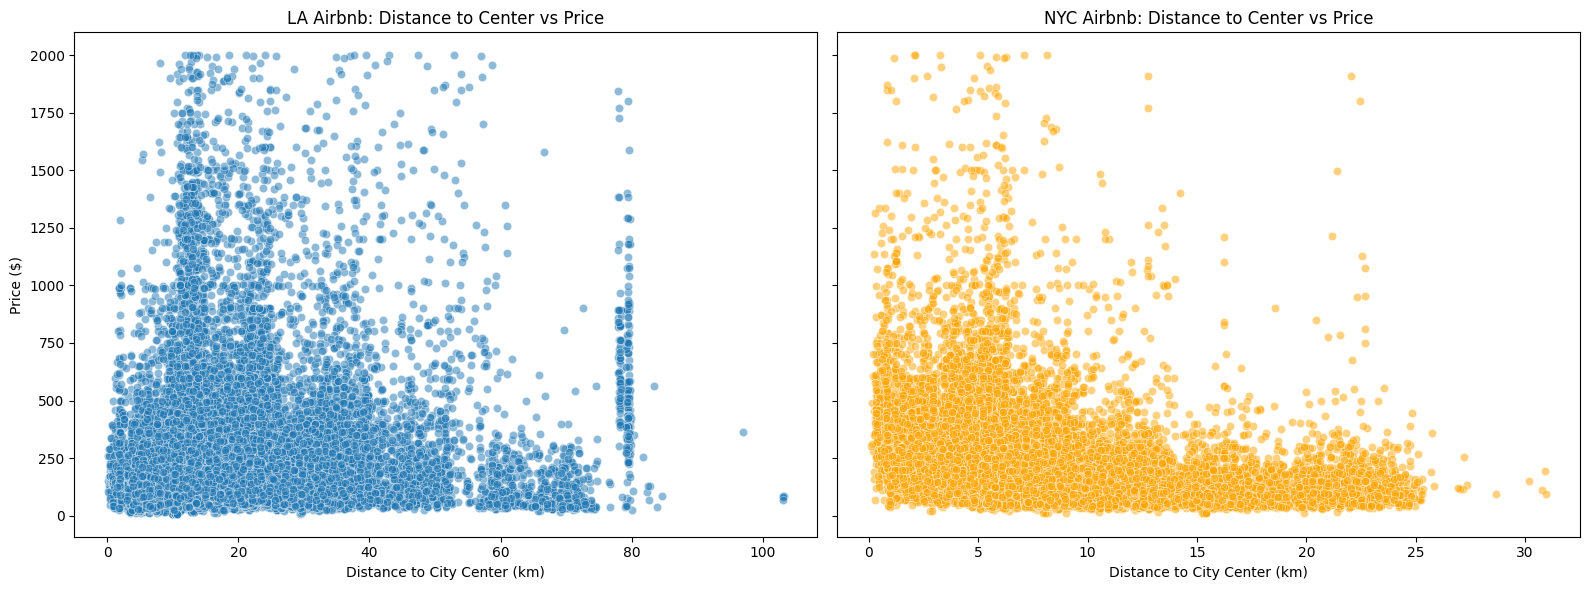

In [19]:
la_valid = la_clean[la_clean['price_integrity_flag'] == 0]
nyc_valid = nyc_clean[nyc_clean['price_integrity_flag'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# LA plot
sns.scatterplot(
    data=la_valid,
    x='dist_to_center_km',
    y='price',
    alpha=0.5,
    ax=axes[0]
)
axes[0].set_title("LA Airbnb: Distance to Center vs Price")
axes[0].set_xlabel("Distance to City Center (km)")
axes[0].set_ylabel("Price ($)")

# NYC plot
sns.scatterplot(
    data=nyc_valid,
    x='dist_to_center_km',
    y='price',
    alpha=0.5,
    color='orange',
    ax=axes[1]
)
axes[1].set_title("NYC Airbnb: Distance to Center vs Price")
axes[1].set_xlabel("Distance to City Center (km)")
axes[1].set_ylabel("Price ($)")

plt.tight_layout()
plt.show()

Exploring same questions but including price extremes, also affect of distance on ratings

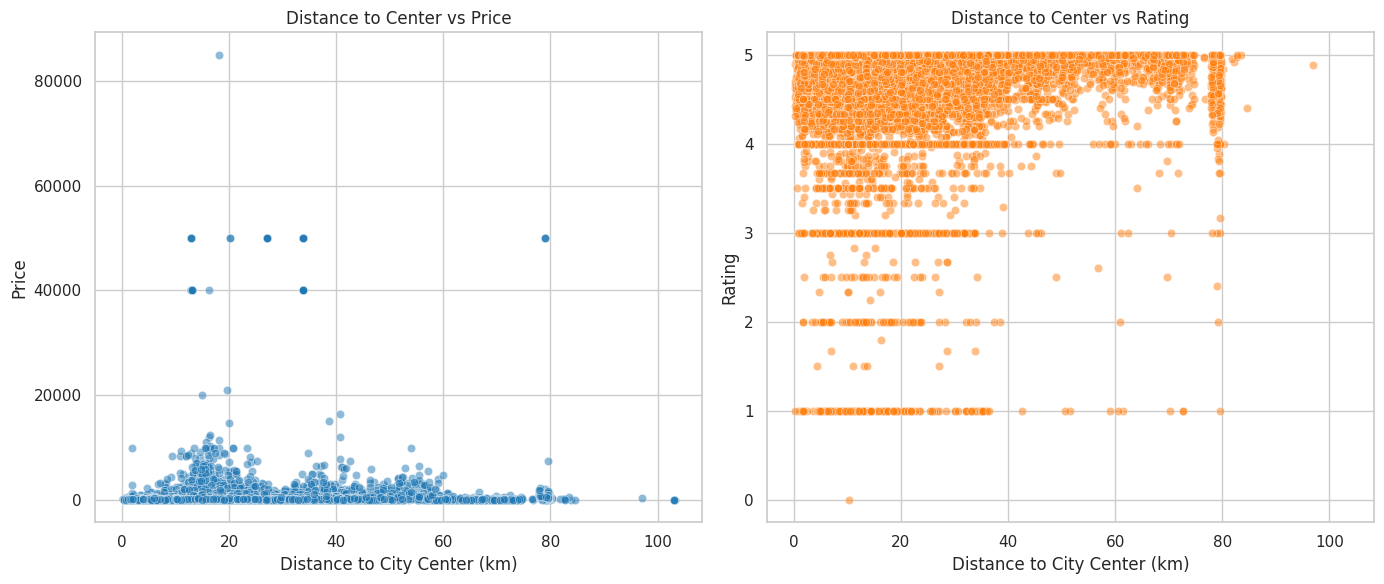

In [20]:
# sns.scatterplot(
#     data=airbnb_la,
#     x='dist_to_center_km',
#     y='review_scores_rating'
# )

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot 1: Distance vs Price
sns.scatterplot(
    data=la_clean,
    x='dist_to_center_km',
    y='price',
    ax=axes[0],
    alpha=0.5,
    color='tab:blue'
)

axes[0].set_title('Distance to Center vs Price')
axes[0].set_xlabel('Distance to City Center (km)')
axes[0].set_ylabel('Price')

# Plot 2: Distance vs Rating
sns.scatterplot(
    data=la_clean,
    x='dist_to_center_km',
    y='review_scores_rating',
    ax=axes[1],
    alpha=0.5,
    color='tab:orange'
)

axes[1].set_title('Distance to Center vs Rating')
axes[1].set_xlabel('Distance to City Center (km)')
axes[1].set_ylabel('Rating')

plt.tight_layout()
plt.show()

**Identifying the "SLA" Tipping Point**

Questions:
- At what point does a delay in response significantly damage the guest experience?

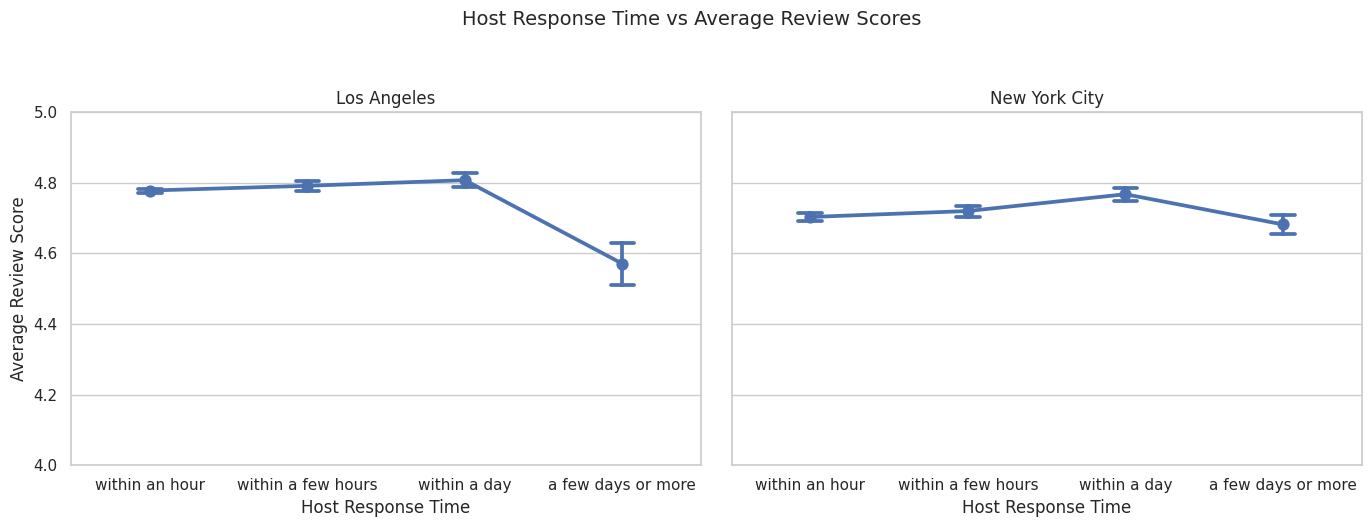

In [21]:
response_order = [
    "within an hour",
    "within a few hours",
    "within a day",
    "a few days or more"
]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# --- Los Angeles ---
sns.pointplot(
    data=la_clean,
    x="host_response_time",
    y="review_scores_rating",
    order=response_order,
    errorbar="ci",
    capsize=0.15,
    ax=axes[0]
)

axes[0].set_title("Los Angeles")
axes[0].set_xlabel("Host Response Time")
axes[0].set_ylabel("Average Review Score")
axes[0].set_ylim(4.0, 5.0)

# --- New York City ---
sns.pointplot(
    data=nyc_clean,
    x="host_response_time",
    y="review_scores_rating",
    order=response_order,
    errorbar="ci",
    capsize=0.15,
    ax=axes[1]
)

axes[1].set_title("New York City")
axes[1].set_xlabel("Host Response Time")
axes[1].set_ylabel("")

# Overall title
fig.suptitle(
    "Host Response Time vs Average Review Scores",
    fontsize=14,
    y=1.05
)

plt.tight_layout()
plt.show()

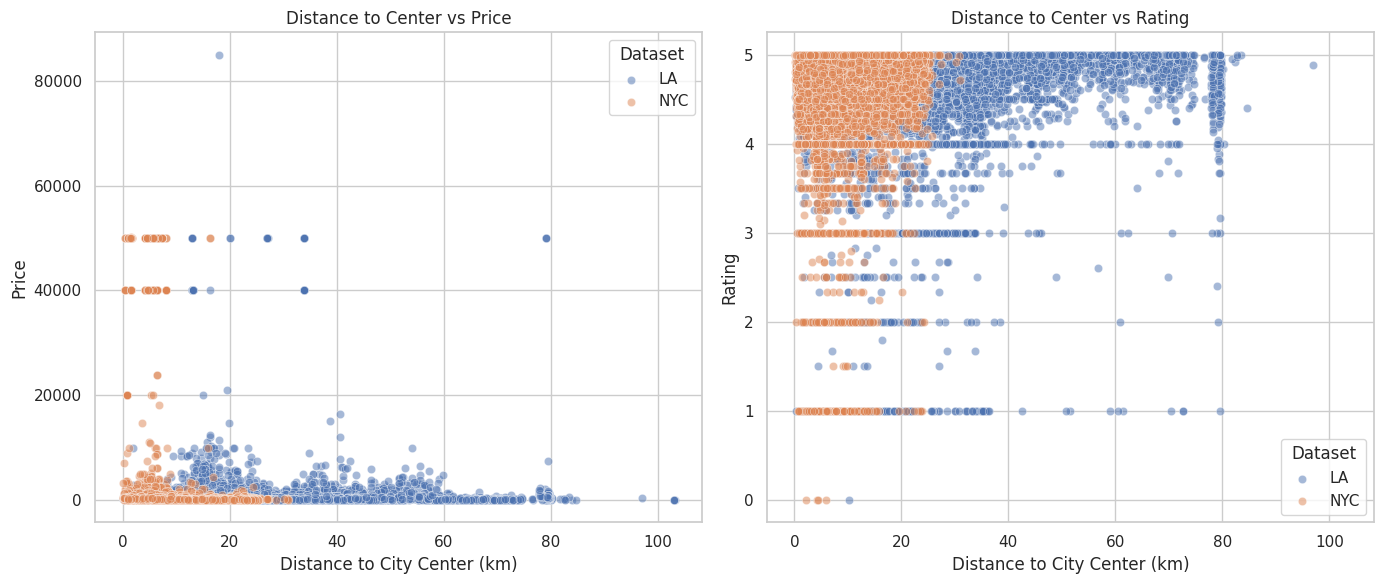

In [22]:
def plot_distance_relationships(
    dfs,
    labels,
    dist_col="dist_to_center_km",
    price_col="price",
    rating_col="review_scores_rating",
    theme="whitegrid"
):
    """
    Scatter plots:
    (1) Distance to center vs Price
    (2) Distance to center vs Review Rating
    Supports multiple datasets on the same axes.
    """
    sns.set_theme(style=theme)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

    # Plot: Distance vs Price
    for df, label in zip(dfs, labels):
        sns.scatterplot(
            data=df,
            x=dist_col,
            y=price_col,
            ax=axes[0],
            alpha=0.5,
            label=label
        )

    axes[0].set_title("Distance to Center vs Price")
    axes[0].set_xlabel("Distance to City Center (km)")
    axes[0].set_ylabel("Price")
    axes[0].legend(title="Dataset")

    # Plot: Distance vs Rating
    for df, label in zip(dfs, labels):
        sns.scatterplot(
            data=df,
            x=dist_col,
            y=rating_col,
            ax=axes[1],
            alpha=0.5,
            label=label
        )

    axes[1].set_title("Distance to Center vs Rating")
    axes[1].set_xlabel("Distance to City Center (km)")
    axes[1].set_ylabel("Rating")
    axes[1].legend(title="Dataset")

    plt.tight_layout()
    plt.show()
plot_distance_relationships(
    dfs=[la_clean, nyc_clean],
    labels=["LA", "NYC"]
)


### Distance Analysis Summary

| Metric | Pattern Observed | Business Insight |
| :--- | :--- | :--- |
| **Price** | Concentrated near center with specialized clusters far out. | You can charge a premium far from the center *if* the location is a destination in itself (e.g., the 80 km cluster). |
| **Rating** | Uniformly high across all distances. | Location (proximity to center) is not a barrier to achieving a perfect score. Quality of service and property matter more than the "km" count. |

Answering the same question, But over entire range of review rating score (0-5)

<Axes: xlabel='host_response_time', ylabel='review_scores_rating'>

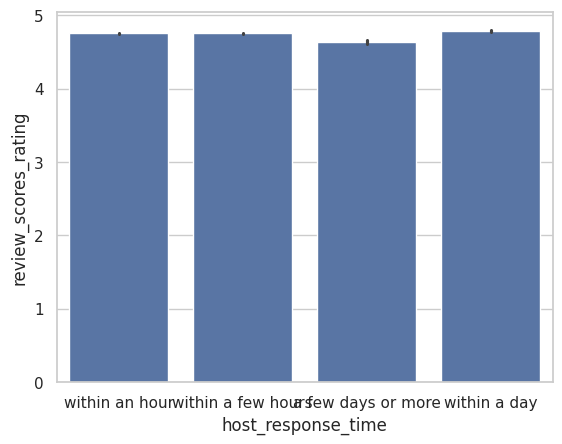

In [23]:
sns.barplot(data = nyc_la_clean, x='host_response_time', y="review_scores_rating")

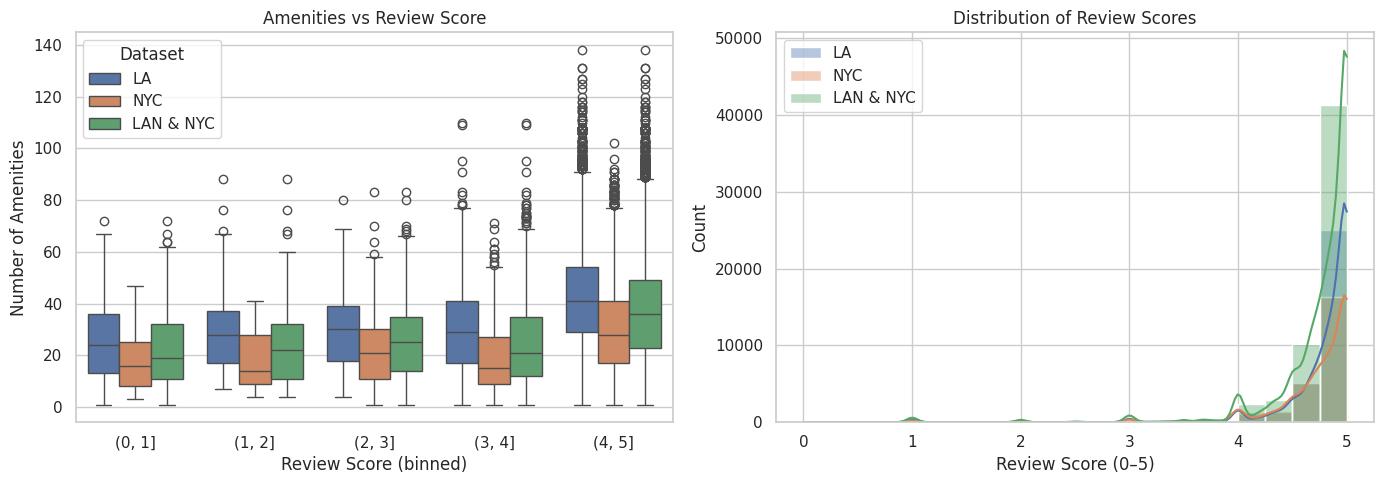

In [24]:
def count_amenities(df, col="amenities"):
    """
    Count number of amenities per listing.
    """
    return (
        df[col]
        .str.replace('[{}"]', '', regex=True)
        .str.split(',')
        .str.len()
    )
def plot_amenities_vs_rating_boxplot(dfs, labels, ax, rating_col="review_scores_rating"):
    """
    Boxplot of number of amenities vs binned review score
    for multiple datasets on the same axes.
    """
    plot_df = []

    for df, label in zip(dfs, labels):
        tmp = pd.DataFrame({
            "rating_bin": pd.cut(df[rating_col], bins=[0, 1, 2, 3, 4, 5]),
            "amenities_count": count_amenities(df),
            "city": label
        })
        plot_df.append(tmp)

    plot_df = pd.concat(plot_df, ignore_index=True)

    sns.boxplot(
        data=plot_df,
        x="rating_bin",
        y="amenities_count",
        hue="city",
        ax=ax
    )

    ax.set_xlabel("Review Score (binned)")
    ax.set_ylabel("Number of Amenities")
    ax.set_title("Amenities vs Review Score")
    ax.legend(title="Dataset")
def plot_amenities_vs_rating_boxplot(dfs, labels, ax, rating_col="review_scores_rating"):
    """
    Boxplot of number of amenities vs binned review score
    for multiple datasets on the same axes.
    """
    plot_df = []

    for df, label in zip(dfs, labels):
        tmp = pd.DataFrame({
            "rating_bin": pd.cut(df[rating_col], bins=[0, 1, 2, 3, 4, 5]),
            "amenities_count": count_amenities(df),
            "city": label
        })
        plot_df.append(tmp)

    plot_df = pd.concat(plot_df, ignore_index=True)

    sns.boxplot(
        data=plot_df,
        x="rating_bin",
        y="amenities_count",
        hue="city",
        ax=ax
    )

    ax.set_xlabel("Review Score (binned)")
    ax.set_ylabel("Number of Amenities")
    ax.set_title("Amenities vs Review Score")
    ax.legend(title="Dataset")
def plot_review_score_histograms(dfs, labels, ax, rating_col="review_scores_rating"):
    """
    Histogram + KDE of review scores for multiple datasets.
    """
    for df, label in zip(dfs, labels):
        sns.histplot(
            df[rating_col],
            bins=20,
            kde=True,
            ax=ax,
            label=label,
            alpha=0.4
        )

    ax.set_xlabel("Review Score (0–5)")
    ax.set_title("Distribution of Review Scores")
    ax.legend()
def plot_airbnb_review_analysis(dfs, labels):
    """
    Orchestrates a side-by-side comparison of amenity impact and rating distributions.

    This function creates a dual-pane dashboard to evaluate guest satisfaction
    drivers across different markets. It delegates the specific plotting tasks to
    two helper functions:
    1. A boxplot analysis (left) to see how the volume of amenities correlates
       with review scores.
    2. A histogram analysis (right) to visualize the frequency and skewness
       of ratings.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    plot_amenities_vs_rating_boxplot(dfs, labels, ax=axes[0])
    plot_review_score_histograms(dfs, labels, ax=axes[1])

    plt.tight_layout()
    plt.show()

plot_airbnb_review_analysis([la_clean,nyc_clean,nyc_la_clean],["LA","NYC","LAN & NYC"])

**Interpretation:**

- Amenity Correlation: There is a positive trend between the number of amenities and review scores. Listings in the highest bin $(4, 5]$ generally feature more amenities than those in lower-rated bins.
- Regional Comparison: LA (blue) consistently provides a higher median number of amenities across all rating categories compared to NYC (orange).
- Rating Distribution: The right plot shows extreme left-skewness. Most reviews are concentrated between 4.5 and 5.0, indicating significant rating inflation in the dataset.

## Question to tackle:

**Preliminaries (to examine and describe the motivation & solution strategy):**

- Duplicate rows? Redundant columns? Missing values? Outliers and extreme outliers? Corrupt entries?
- Examine the distribution and descriptive stats of the dependent and independent variables. Do they match expectations?

**Which attributes correlate better with rating?**
- Host attributes, e.g., response time, response rate, number of listings, verifications
- Property attributes, e.g., type, number of bathrooms and bedrooms, amenities
- Listing attributes, e.g., min. and/or max. number of nights, instant bookability

**More EDA questions to cover:**
- Price: Investigate whether certain listing price ranges exhibit higher rating.
- City: Are there significant similarities or dissimilarities between NYC and LA listings?
- Free-text features: Is there any correlation of the rating with metadata of free-text features such as the length (or even the existence) of host_about, name, description, neighbourhood_overview?
- Come up with your own hypothesis about the AirBnB dataset
    1. Define hypothesis, take the relevant data from this dataset, and investigate.



# Numeric & Categorical Feature Analysis

## Data Preparations

- The focus of the following analysis is going to be only on numeric data

In [25]:
import ast

numeric_columns = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
                   'host_total_listings_count', 'accommodates',
                   'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
                   'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                   'estimated_occupancy_l365d', 'instant_bookable', 'review_scores_rating',
                   'host_is_superhost','host_has_profile_pic','capacity_issue',
                   'dist_to_center_km', 'host_years', 'amount_of_amenities']

def prepare_numerics_df(df):
    """
    Refines and engineers a numeric-only representation of the Airbnb dataset.

    This function prepares a clean feature matrix by performing the following steps:
    * **Target Integrity:** Removes rows where critical variables ('price' and 'review_scores_rating')
        are missing, as these are typically the dependent variables or key features.
    * **Rate Normalization:** Identifies columns containing rate information and scales
        them from percentage integers (0-100) to decimal floats (0-1).
    * **Binary Encoding:** Maps categorical string booleans ('t'/'f') to numeric indicators (1/0).
    * **Temporal Feature Extraction:** Derives a 'host_years' feature representing the
        host's tenure based on a fixed baseline of 2025.
    * **Quantification:** Parses string-formatted list data in the 'amenities' column to
        extract a raw count of features offered by the host.
    """
    df_numeric = df.copy()
    # drop nans
    df_numeric = df_numeric.dropna(subset=['price', 'review_scores_rating'])

    # remove non numeric characters
    for col in numeric_columns:
        if 'rate' in col:
            df_numeric[col] = df_numeric[col] / 100

    # convert booleans to number
    df_numeric['instant_bookable'] = df_numeric['instant_bookable'].map({'t': 1, 'f': 0})

    #add columns
    current_year = 2025
    df_numeric['host_years'] = current_year - df_numeric['host_since'].dt.year
    df_numeric['amount_of_amenities'] = df['amenities'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)


    return df_numeric

la_numeric = prepare_numerics_df(la_clean)[numeric_columns]
nyc_numeric = prepare_numerics_df(nyc_clean)[numeric_columns]

## Analysis

In a comparative study like AirBnB listing (LA vs. NYC), checking the row counts is the first step in identifying Sample Size Imbalance.

In [26]:
print(f"amount of listings in LA: {la_numeric.shape[0]}")
print(f"amount of listings in NYC: {nyc_numeric.shape[0]}")

amount of listings in LA: 27379
amount of listings in NYC: 14944


**Significant Sample Size Disparity**

- The Ratio: Los Angeles has approximately 1.83 times as many listings as New York City in your current "cleaned" numeric dataset.

- The Representation: LA represents roughly 65% of your total combined data, while NYC represents only 35%.

This implies that combined results is pretty biased to LA so we will not look at the combined data. We will focus on each dataset separately

### Correlations

In [27]:
def plot_heatmap(corr_matrix, title = None, annot=False):
    """
    Visualizes a correlation matrix using a heatmap with dynamic sizing based on feature count.
    Supports optional coefficient annotations and custom titles for better readability.
    """
    n_features = len(corr_matrix.columns)
    plt.figure(figsize=(n_features * 0.3, n_features * 0.25))
    if annot:
        sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 7})
    else:
        sns.heatmap(corr_matrix, cmap='coolwarm')
    if title:
        plt.title(title)
    else:
        plt.title("Correlations")
    plt.show()

def show_meaningful_correlations(corr_matrix, threshold):
    """
    Extracts and sorts unique feature pairs from a correlation matrix that exceed a specific absolute threshold.
    Filters out redundant self-correlations and duplicates to focus on the most significant relationships.
    """
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    meaningful_corr = upper_tri.unstack().dropna()
    meaningful_corr = meaningful_corr[meaningful_corr.abs() > threshold].sort_values(ascending=False)
    return meaningful_corr

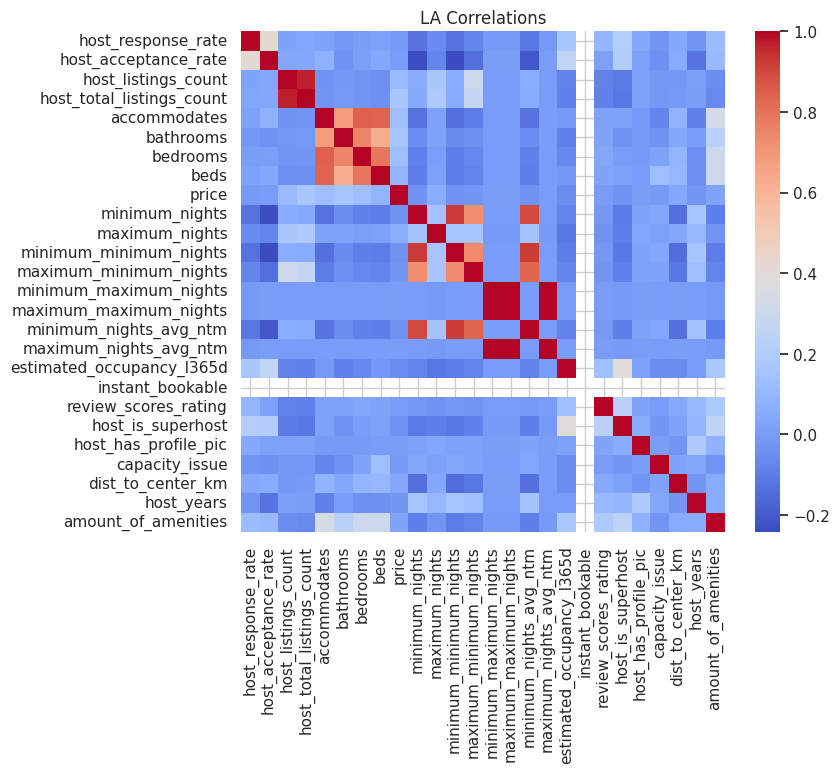

In [28]:
corr_matrix = la_numeric.corr()
plot_heatmap(corr_matrix, title='LA Correlations')

For LA we see that all the columns instant_booking is always NaN in the clean data so we drop it and check only the interesting correlations

In [29]:
la_numeric = la_numeric.drop(columns=['instant_bookable'])
corr_matrix = la_numeric.corr()
meaningful_threshold = 0.3
print(f"Meaningful Correlations (> meaningful_threshold):")
print(show_meaningful_correlations(corr_matrix, meaningful_threshold))

Meaningful Correlations (> meaningful_threshold):
maximum_nights_avg_ntm     minimum_maximum_nights       1.000000
                           maximum_maximum_nights       1.000000
maximum_maximum_nights     minimum_maximum_nights       1.000000
host_total_listings_count  host_listings_count          0.966804
minimum_minimum_nights     minimum_nights               0.926128
minimum_nights_avg_ntm     minimum_minimum_nights       0.920274
                           minimum_nights               0.895328
bedrooms                   accommodates                 0.843671
beds                       accommodates                 0.837549
minimum_nights_avg_ntm     maximum_minimum_nights       0.833205
beds                       bedrooms                     0.791231
bedrooms                   bathrooms                    0.745485
maximum_minimum_nights     minimum_minimum_nights       0.733192
                           minimum_nights               0.720151
bathrooms                  accommodates 

Besides the obvious correlations we see that there are some interesting moderate correlations

- host_acceptance_rate and host_response_rate

this shows that customer have preference for super hosts (since they are more occupied)

- host_is_superhost and estimated_occupancy_l365d

hosts that reply to more customers are accepting more (makes sense)

- maximum_minimum_nights and host_listings_count

this mild correlation shows that the more listings you have, the higher the minimum nights are, this could indicate that either the customers trust those hosts more and rather take more nights or (and this makes more sense) that those hosts tend to accept customers with more nights in the listing because it gives them less overhead (they more listings to handle)

- another mild correlation is amount_of_amenities to beds

this could mean that the more beds in the listing the property is more "generous" in the amenities it provide (to attarct more ppl for the asset which contain more beds)

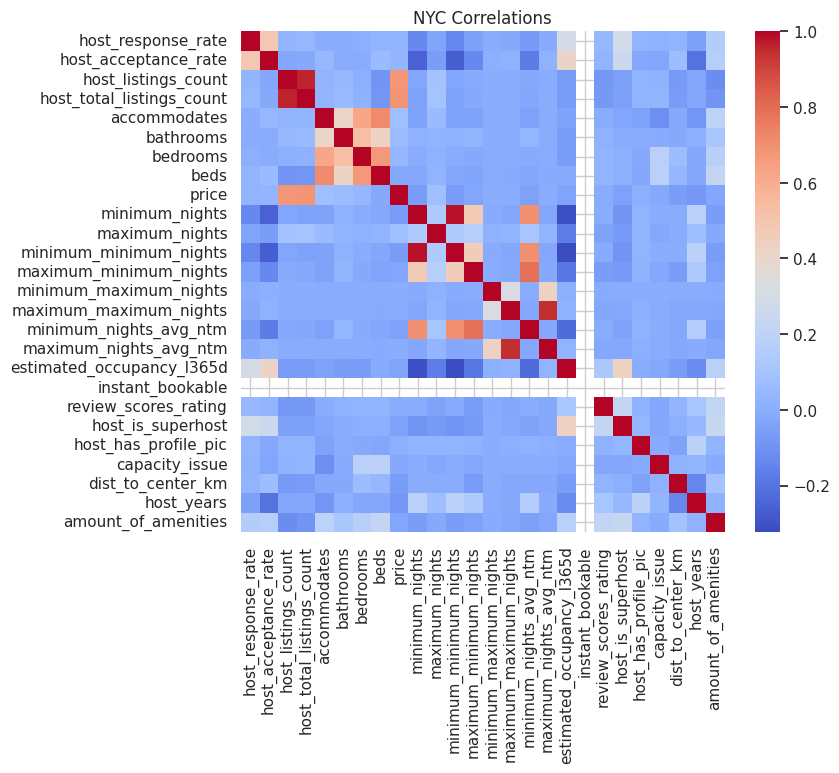

In [30]:
corr_matrix = nyc_numeric.corr()
plot_heatmap(corr_matrix, title='NYC Correlations')

the clean NYC listings have no instant booking as well

In [31]:
nyc_numeric = nyc_numeric.drop(columns=['instant_bookable'])
corr_matrix = nyc_numeric.corr()
meaningful_threshold = 0.3
print(f"Meaningful Correlations (> meaningful_threshold):")
print(show_meaningful_correlations(corr_matrix, meaningful_threshold))

Meaningful Correlations (> meaningful_threshold):
minimum_minimum_nights     minimum_nights               0.983533
host_total_listings_count  host_listings_count          0.959125
maximum_nights_avg_ntm     maximum_maximum_nights       0.944114
minimum_nights_avg_ntm     maximum_minimum_nights       0.792581
beds                       accommodates                 0.720230
minimum_nights_avg_ntm     minimum_minimum_nights       0.700467
                           minimum_nights               0.700245
price                      host_total_listings_count    0.685956
                           host_listings_count          0.681255
beds                       bedrooms                     0.672753
bedrooms                   accommodates                 0.625249
                           bathrooms                    0.527901
host_acceptance_rate       host_response_rate           0.491703
maximum_minimum_nights     minimum_nights               0.469331
                           minimum_minim

for NYC the correlations are stronger than LA, We'll focus on the non obvious correlations and the correlations that we did not see in LA

- 0.68-0.69 correlation between price with host_total_listings_count and price with host_listings_count

when a host have more listings he tend to take higher price! this could indicate that the hosts that have higher listings have higher demand thus they can allow themselves to charge higher

- around -0.32 correlation between estimated_occupancy_l365d and  minimum_nights

the listings that are more occupied are the ones that accept shorter stayings

- around 0.43 moderate positive correlation between host_is_superhost and estimated_occupancy_l365d

this shows that superhosts are generally more occupied during the year because customers trust them more

#### Does the listings in high demand (high estimated occupancy) have better correlations?

In [32]:
listings_in_demand = la_numeric[la_numeric['estimated_occupancy_l365d'] > 150]
corr_matrix = listings_in_demand.corr()
meaningful_threshold = 0.3
print(f"Meaningful Correlations (> meaningful_threshold):")
print(show_meaningful_correlations(corr_matrix, meaningful_threshold))


Meaningful Correlations (> meaningful_threshold):
maximum_nights_avg_ntm     maximum_maximum_nights       0.988323
                           minimum_maximum_nights       0.982925
maximum_maximum_nights     minimum_maximum_nights       0.961462
host_total_listings_count  host_listings_count          0.944485
minimum_nights_avg_ntm     maximum_minimum_nights       0.878536
beds                       accommodates                 0.877576
bedrooms                   accommodates                 0.860207
minimum_minimum_nights     minimum_nights               0.852046
minimum_nights_avg_ntm     minimum_minimum_nights       0.819284
beds                       bedrooms                     0.812532
minimum_nights_avg_ntm     minimum_nights               0.788417
bedrooms                   bathrooms                    0.740403
price                      host_listings_count          0.735161
bathrooms                  accommodates                 0.691357
maximum_minimum_nights     minimum_minim

As expected, we see a very strong correlation of 0.735 between price and the amount of listings, those hosts can charge more

In addition to this, we see that between those popular listings, if you are superhost you gain higher score!

### Scores

#### Statistics

In [33]:
la_numeric['city'] = 'LA'
nyc_numeric['city'] = 'NYC'
df_combined = pd.concat([la_numeric, nyc_numeric], ignore_index=True)

ratings = df_combined.groupby('city')['review_scores_rating'].describe()
ratings

count      mean       std  min   25%   50%  75%  max
city                                                        
LA    27379.0  4.782029  0.426175  1.0  4.75  4.91  5.0  5.0
NYC   14944.0  4.730510  0.449908  1.0  4.67  4.86  5.0  5.0

LA scores are higher than NYC on average and with less variance

#### How the scores distribution looks

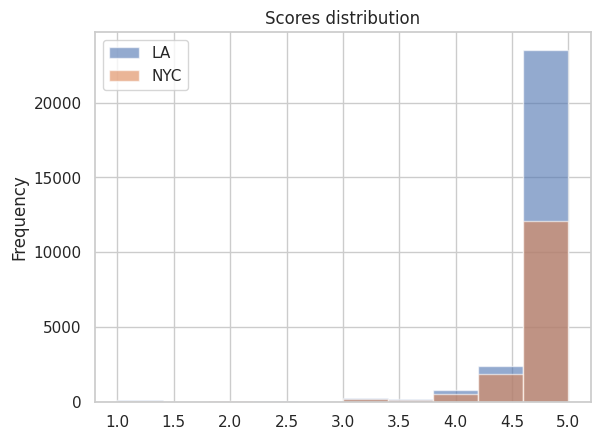

In [34]:
la_numeric.review_scores_rating.plot(kind='hist', bins=10, alpha=0.6, label='LA')
nyc_numeric.review_scores_rating.plot(kind='hist', bins=10, alpha=0.6, label='NYC')
plt.legend()
_ = plt.title('Scores distribution')

WOW! the scores are VERY left skewed, most scored are very positive.

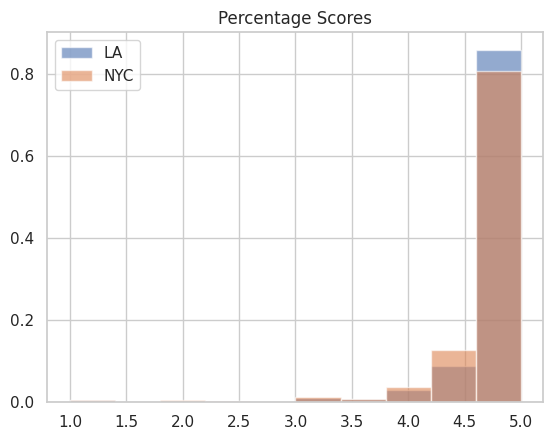

In [35]:
la_weights = np.ones(len(la_numeric['review_scores_rating'])) / len(la_numeric['review_scores_rating'])
nyc_weights = np.ones(len(nyc_numeric['review_scores_rating'])) / len(nyc_numeric['review_scores_rating'])

plt.hist(la_numeric['review_scores_rating'], bins=10, alpha=0.6, label='LA', weights=la_weights)
plt.hist(nyc_numeric['review_scores_rating'], bins=10, alpha=0.6, label='NYC', weights=nyc_weights)
plt.legend()
plt.title('Percentage Scores')
plt.show()


LA not only have higher scores on avg but also the percentage of the high scores is higher.

#### Does super hosts get higher ratings?

In [36]:
ratings = df_combined.groupby(['host_is_superhost','city'])['review_scores_rating'].mean()
ratings

host_is_superhost  city
0.0                LA      4.673268
                   NYC     4.650671
1.0                LA      4.871498
                   NYC     4.857516
Name: review_scores_rating, dtype: float64

Indeed, as expected super hosts are getting on average higher scores!

In [37]:
la_clean.groupby(['property_type', 'room_type'])['review_scores_rating'].mean()

property_type  room_type      
Barn           Entire home/apt    4.710000
Boat           Entire home/apt    4.327778
Bus            Entire home/apt    5.000000
Camper/RV      Entire home/apt    4.766930
Campsite       Entire home/apt    4.978000
                                    ...   
Tipi           Entire home/apt    5.000000
Tower          Entire home/apt    4.985000
Train          Entire home/apt    4.956667
Treehouse      Entire home/apt    4.890000
Yurt           Entire home/apt    4.847143
Name: review_scores_rating, Length: 98, dtype: float64

#### Does the type of room effect the avg scores rating

In [38]:
print("LA")
la_clean.groupby(['room_type'])['review_scores_rating'].mean().dropna().sort_values(ascending=False)

LA


room_type
Entire home/apt    4.798146
Private room       4.724539
Shared room        4.590539
Hotel room         4.422985
Name: review_scores_rating, dtype: float64

In [39]:
print("NYC")
nyc_clean.groupby(['room_type'])['review_scores_rating'].mean().dropna().sort_values(ascending=False)

NYC


room_type
Entire home/apt    4.749795
Shared room        4.742000
Private room       4.690323
Hotel room         4.488455
Name: review_scores_rating, dtype: float64

- In both cities customers liked entire home/apt the most and liked the least the hotel rooms.

- While customers in LA ranked private room higher, the customers in ranked shared rooms higher! this could relate to the fact that the prices in LA are higher

#### Does the amount of bedrooms affects the score?

In [40]:
city_corr = df_combined.groupby('city').apply(
    lambda x: x['price'].corr(x['review_scores_rating']),
    include_groups=False
).reset_index(name='correlation_price_rating')
city_corr

city  correlation_price_rating
0   LA                 -0.002596
1  NYC                 -0.005986

The amount of bedrooms have no effect whatsoever on the score

#### Does the the amount of years the host is in the site affects his score?

LA Mean host_years: 7.51
LA Median host_years: 8.00
NYC Mean host_years: 7.93
NYC Median host_years: 8.00


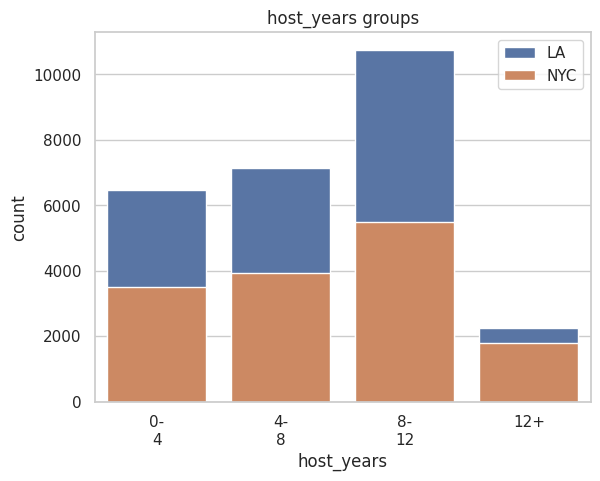

In [41]:
def get_bin_labels(bins):
    """
    Generates dynamic string labels for numeric bins, including an open-ended '+' label for the final interval.
    Useful for creating clean, readable axis tick labels in categorical plots.
    """
    labels = [f"{bins[i]}-\n{bins[i+1]}" for i in range(len(bins)-2)]
    labels.append(f"{bins[-2]}+")
    return labels

def plot_bins_stats(df, column_groups, colum_value, bins, labels, city):
    """
    Calculates central tendency metrics and visualizes the distribution of binned data using a count plot.
    Returns a grouped DataFrame along with the mean and median for further comparative analysis between cities.
    """
    col_mean = df[column_groups].mean()
    col_med = df[column_groups].median()
    print(f"{city} Mean {column_groups}: {col_mean:.2f}")
    print(f"{city} Median {column_groups}: {col_med:.2f}")

    ranges = pd.cut(df[column_groups], bins=bins, labels=labels)
    ranges_df = pd.DataFrame({
    colum_value: df[colum_value],
    'group': ranges
    })
    sns.countplot(x=ranges, label=city)
    plt.title(f"{column_groups} groups")
    plt.legend()

    return ranges_df, col_mean, col_med

bins = [0,4,8,12,np.inf]
labels = get_bin_labels(bins)

la_ranges, _, _ = plot_bins_stats(la_numeric, 'host_years', 'review_scores_rating', bins, labels, 'LA')
nyc_ranges, _, _ = plot_bins_stats(nyc_numeric, 'host_years', 'review_scores_rating', bins, labels, 'NYC')

In [42]:
la_ranges.groupby('group')['review_scores_rating'].mean().sort_values(ascending=False)

/tmp/ipython-input-3804807161.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  la_ranges.groupby('group')['review_scores_rating'].mean().sort_values(ascending=False)


group
12+       4.841563
8-\n12    4.814553
4-\n8     4.768373
0-\n4     4.738325
Name: review_scores_rating, dtype: float64

In [43]:
nyc_ranges.groupby('group')['review_scores_rating'].mean().sort_values(ascending=False)

/tmp/ipython-input-2477365699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nyc_ranges.groupby('group')['review_scores_rating'].mean().sort_values(ascending=False)


group
12+       4.782351
8-\n12    4.779825
4-\n8     4.712018
0-\n4     4.668638
Name: review_scores_rating, dtype: float64

As expected, the hosts that are longer in the site gets better avg scores, even if by small amount

### Prices

#### General Statistics

Let's examine the prices of the listings

In [44]:
la_numeric.price.describe()

count    27379.000000
mean       268.775120
std       1320.910763
min          9.000000
25%         95.000000
50%        150.000000
75%        247.000000
max      50053.000000
Name: price, dtype: float64

In [45]:
nyc_numeric.price.describe()

count    14944.000000
mean       349.515792
std       2627.869167
min         10.000000
25%         91.000000
50%        150.000000
75%        242.000000
max      50104.000000
Name: price, dtype: float64

While both cities shows same median of 150, LA prices are on average lower than NYC prices but due to the high variance its very hard to rely on the mean, and in NYC the variance is very high and the prices ranged a lot.

In addition, both datasets are heavily right-skewed!

#### Prices vs Scores

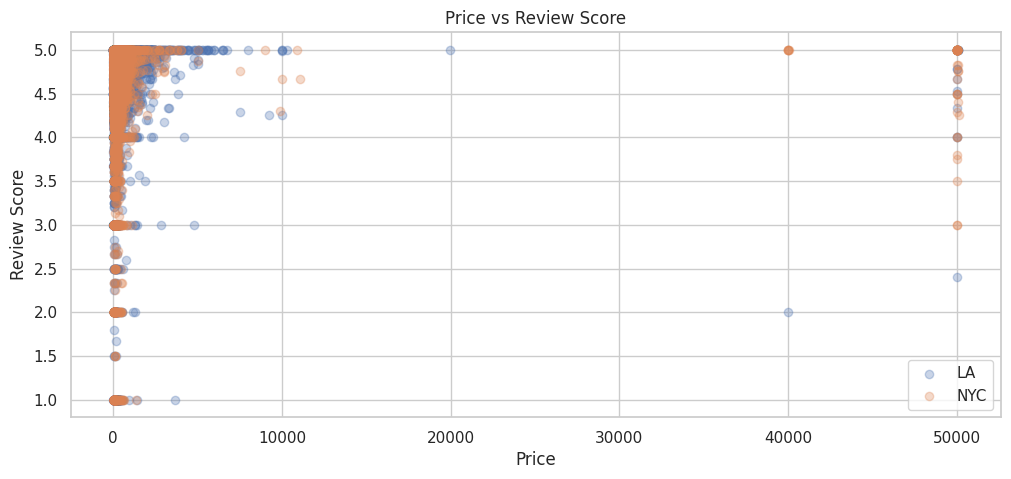

In [46]:
plt.figure(figsize=(12, 5))
plt.scatter(la_numeric.price, la_numeric.review_scores_rating, alpha=0.3, label='LA')
plt.scatter(nyc_numeric.price, nyc_numeric.review_scores_rating, alpha=0.3, label='NYC')
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.title('Price vs Review Score')
plt.legend()
plt.show()

We are not surprised to see that the vast majority of scores are above 4, but it is surprising to see that there are many extreme high prices that could be outliers. In addition as we saw before we can see that LA have higher prices in avg.

Mean price for LA: 268.78
Median price for LA: 150.00
Mean price for NYC: 349.52
Median price for NYC: 150.00


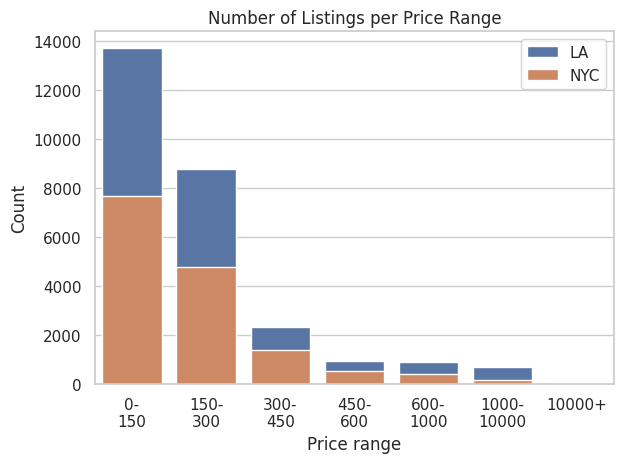

In [47]:
bins = [0,150,300,450,600,1000, 10000, np.inf]
labels = get_bin_labels(bins)
la_numeric['price_range'] = pd.cut(la_numeric['price'], bins=bins, labels=labels)
nyc_numeric['price_range'] = pd.cut(nyc_numeric['price'], bins=bins, labels=labels)
sns.countplot(x=la_numeric.price_range, label='LA')
sns.countplot(x=nyc_numeric.price_range, label='NYC')
plt.legend()

prices_mean = la_numeric['price'].mean()
prices_med = la_numeric['price'].median()
print(f"Mean price for LA: {prices_mean:.2f}")
print(f"Median price for LA: {prices_med:.2f}")

prices_mean = nyc_numeric['price'].mean()
prices_med = nyc_numeric['price'].median()
print(f"Mean price for NYC: {prices_mean:.2f}")
print(f"Median price for NYC: {prices_med:.2f}")

plt.title("Number of Listings per Price Range")
plt.xlabel("Price range")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

the vast majority of the listings are up to 300$ and with the median of 150 it makes sense. also it is very clear that this distribution of the prices is very right-skewed

#### Is certain listing price ranges exhibit higher rating

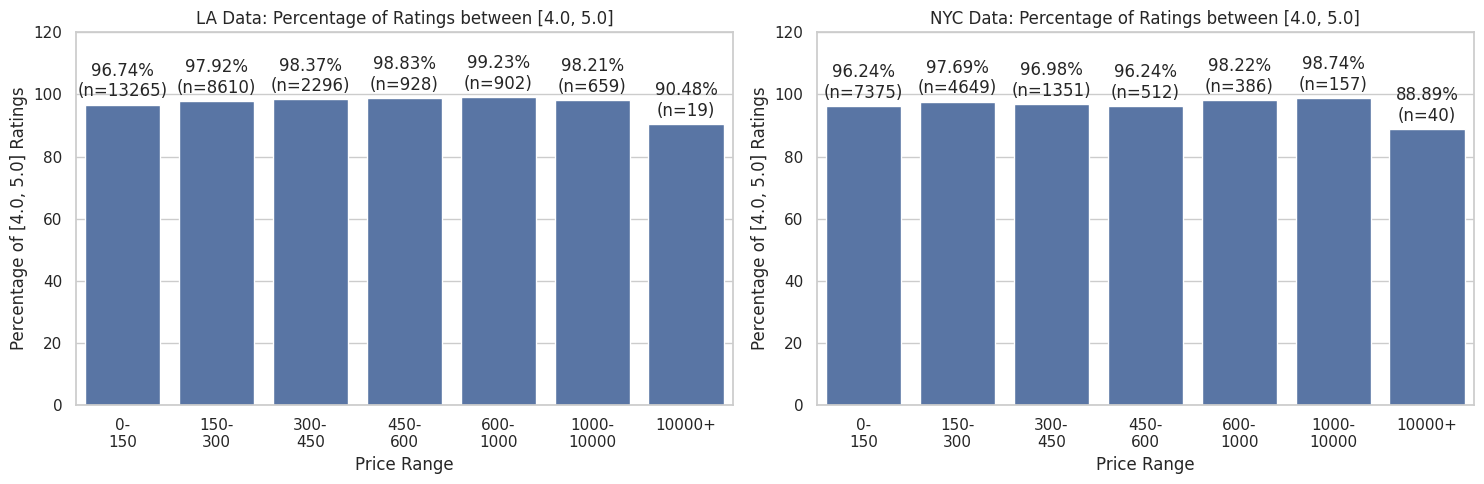

In [48]:
def plot_percentage_stats(data, data_name, bins, labels, score_range):
    binned_prices = pd.cut(data['price'], bins=bins, labels=labels)

    stats = data.groupby(binned_prices, observed=False)['review_scores_rating'].agg(
        count=lambda x: x.between(*score_range).sum(),
        total=lambda x: x.count()
    ).reset_index()
    stats['percentage'] = (stats['count'] / stats['total'] * 100).dropna()
    ax = sns.barplot(x='price', y='percentage', data=stats)

    custom_labels = [f'{p:.2f}%\n(n={int(c)})' for p, c in zip(stats['percentage'], stats['count'])]

    for container in ax.containers:
        # valid_bars = [bar for bar in container if bar is not None]
        ax.bar_label(container, labels=custom_labels, padding=3)

    plt.title(f"{data_name} Data: Percentage of Ratings between {score_range}")
    plt.ylabel(f"Percentage of {score_range} Ratings")
    plt.xlabel("Price Range")
    plt.ylim(0, 120)

score_range = [4.0, 5.0]
bins = [0,150,300,450,600,1000, 10000, np.inf]
labels = get_bin_labels(bins)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_percentage_stats(la_numeric, "LA", bins, labels, score_range)
plt.subplot(1, 2, 2)
plot_percentage_stats(nyc_numeric, "NYC", bins, labels, score_range)
plt.tight_layout()
plt.show()

close to uniform distribution per range.. this could be because most of the votings are very high, lets try to focus on almost perfect scores

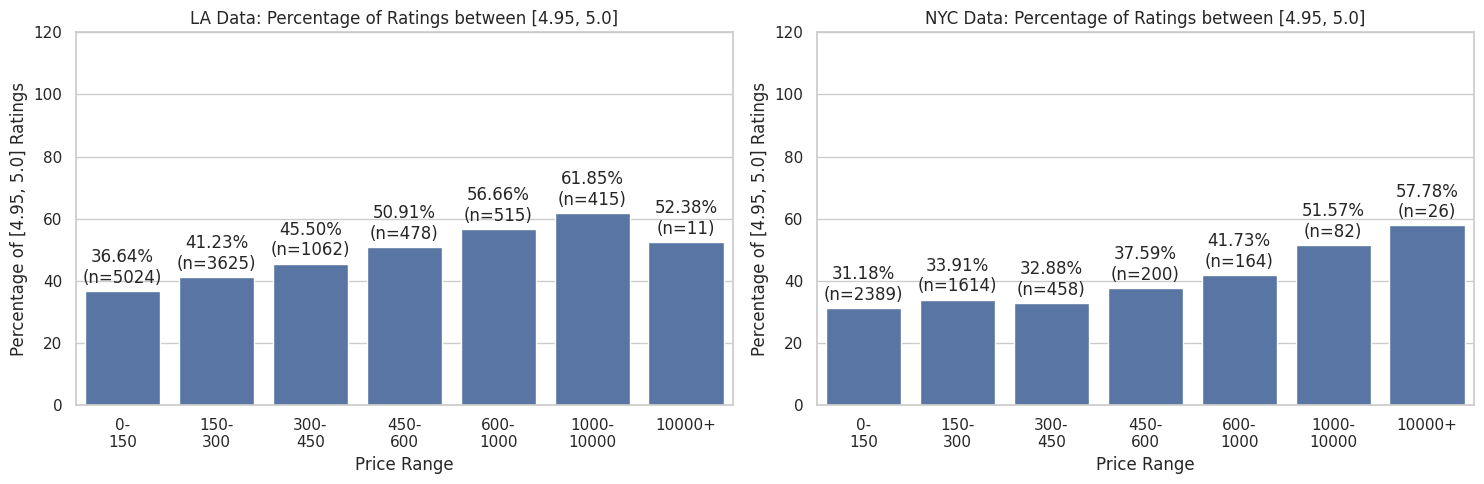

In [49]:
score_range = [4.95, 5.0]
bins = [0,150,300,450,600,1000, 10000, np.inf]
labels = get_bin_labels(bins)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_percentage_stats(la_numeric, "LA", bins, labels, score_range)
plt.subplot(1, 2, 2)
plot_percentage_stats(nyc_numeric, "NYC", bins, labels, score_range)
plt.tight_layout()
plt.show()

Ok so we see a clear trend in NYC where higher price is linked to higher quality of listing (higher rating) and in LA its the same but up to 10000 (and for 10000 there are only 11 listings which is negligible)

#### Is super hosts take more money than non super hosts?

In [50]:
la_numeric.groupby('host_is_superhost')['price'].mean()

host_is_superhost
0.0    328.149320
1.0    225.040598
Name: price, dtype: float64

In [51]:
nyc_numeric.groupby('host_is_superhost')['price'].mean()

host_is_superhost
0.0    445.931831
1.0    202.831116
Name: price, dtype: float64

Amazing! we see that the super hosts that are more reliable are usualy the ones that on average take lower prices!

### Analysis on Text related data:

[]

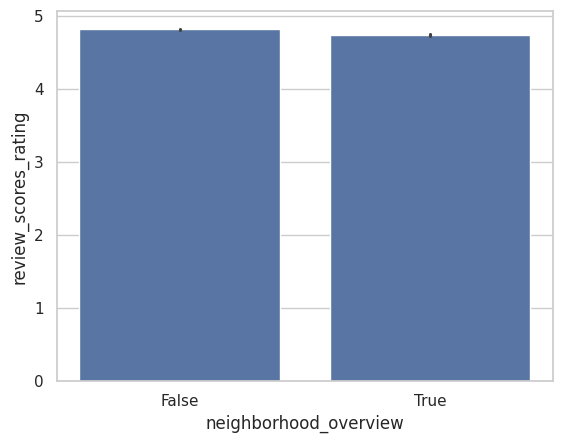

In [52]:
neighborhood_overview = la_clean.neighborhood_overview.isna()
sns.barplot(x=neighborhood_overview, y=la_clean['review_scores_rating'])
plt.plot()

- No clear pattern can be observed for missing and non missing data, plus it is long free-text feature which is hard to impute meaningfully better to drop this columns entirely during model training
- Same goes for host about column where is it's difficult to impute the data and there are almost 45% missing data, so better to drop this column too

In [53]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, cols, bins=60, kde=True, log_scale=False):
    """
    Automates the creation of a grid of histograms and density plots for a list of columns.
    It dynamically calculates the necessary grid dimensions, handles missing values,
    and supports log-scaling to help visualize highly skewed distributions.
    """
    n = len(cols)
    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        sns.histplot(
            df[col].dropna(),
            bins=bins,
            kde=kde,
            log_scale=log_scale,
            ax=ax
        )
        ax.set_title(col)
        ax.set_xlabel(col)

    # hide unused subplots
    for ax in axes[len(cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


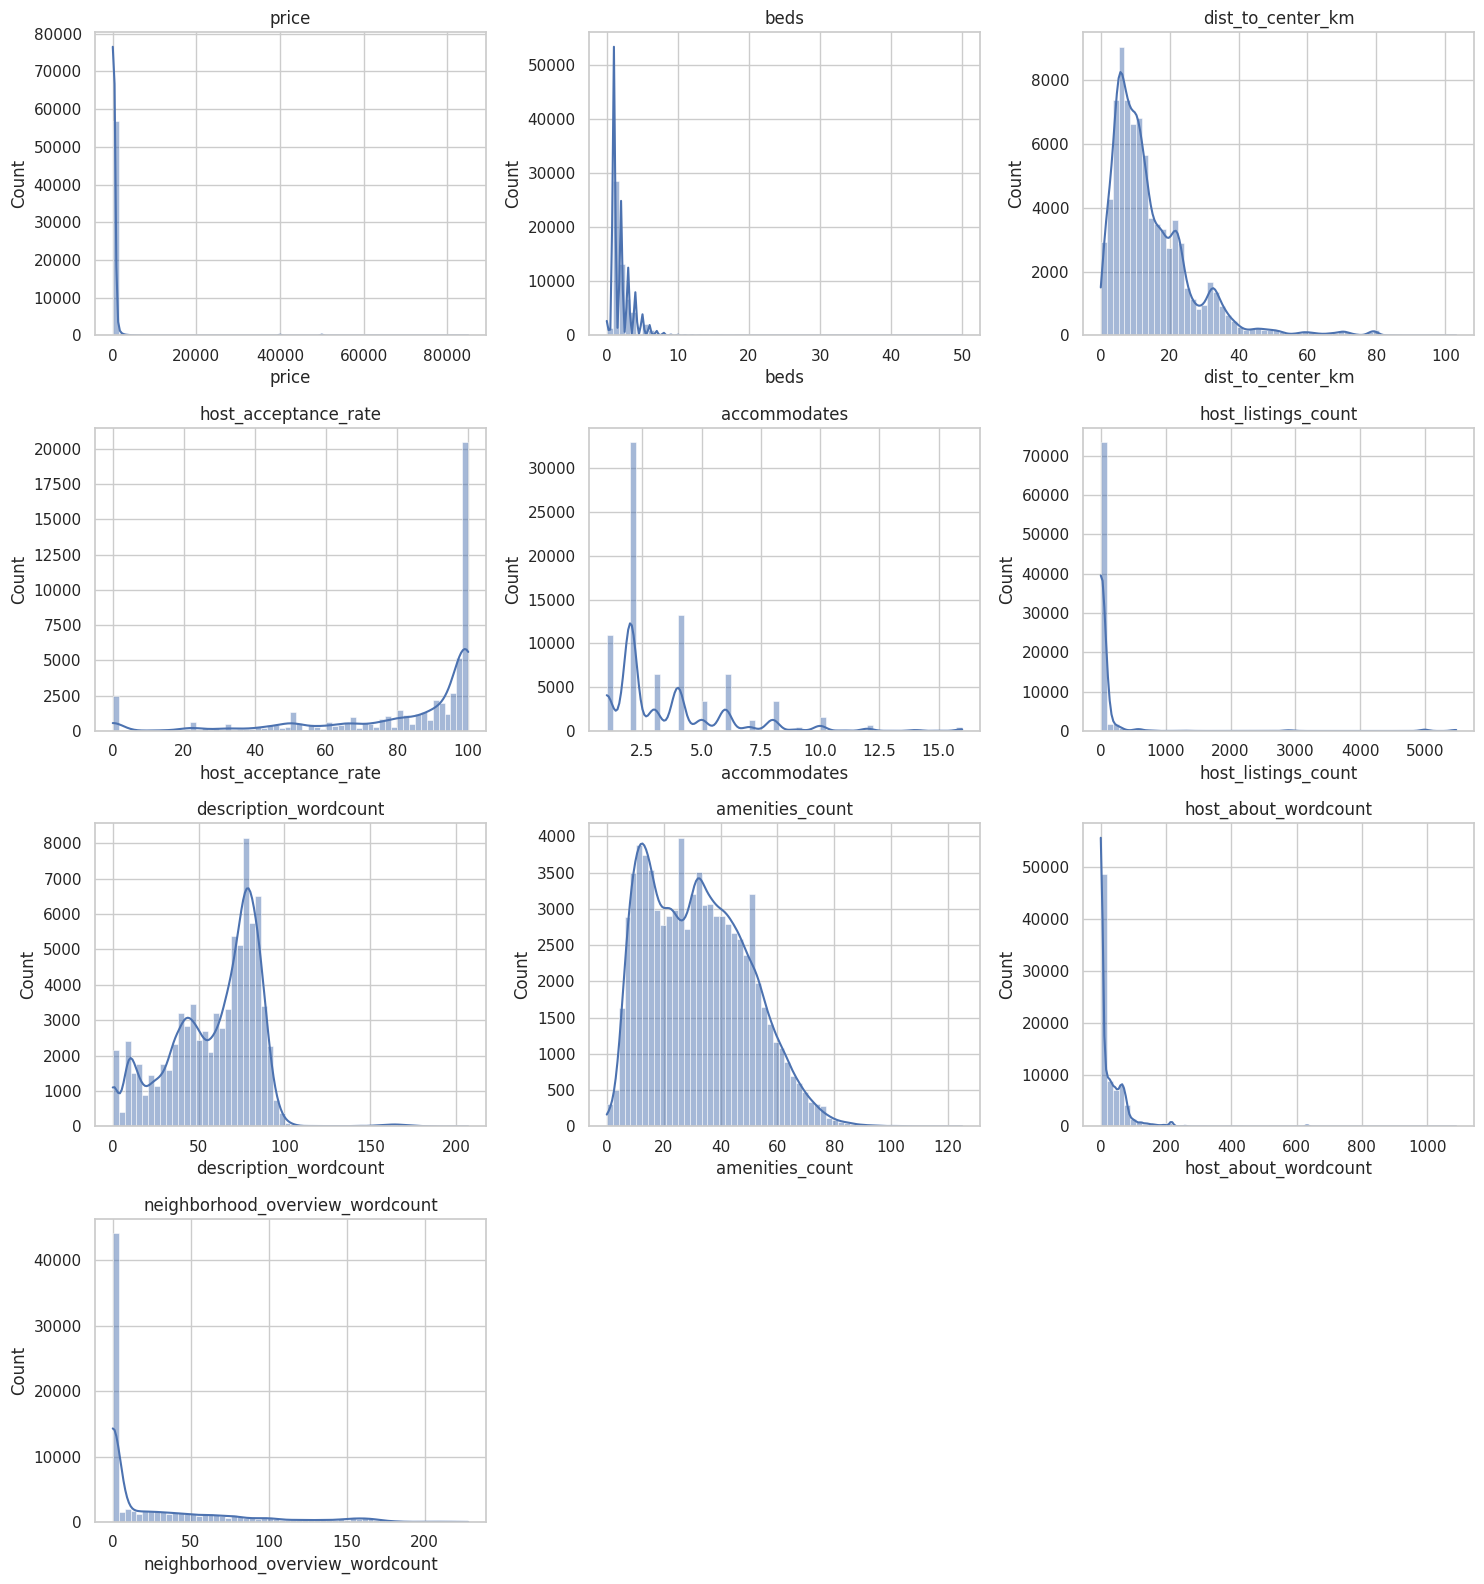

In [54]:
cols=['price','beds','dist_to_center_km','host_acceptance_rate','accommodates','host_listings_count','description_wordcount', 'amenities_count','host_about_wordcount', 'neighborhood_overview_wordcount']
plot_distributions(nyc_la_clean,cols)

In [55]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions_multi(
    dfs,
    labels,
    cols,
    bins=60,
    kde=True,
    log_scale=False,
    alpha=0.4
):
    """
    Plot histograms (and optional KDE) for multiple datasets
    on the same axes for each column.
    """
    n = len(cols)
    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        for df, label in zip(dfs, labels):
            sns.histplot(
                df[col].dropna(),
                bins=bins,
                kde=kde,
                log_scale=log_scale,
                ax=ax,
                label=label,
                alpha=alpha
            )

        ax.set_title(col)
        ax.set_xlabel(col)
        ax.legend()

    # Hide unused subplots
    for ax in axes[len(cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


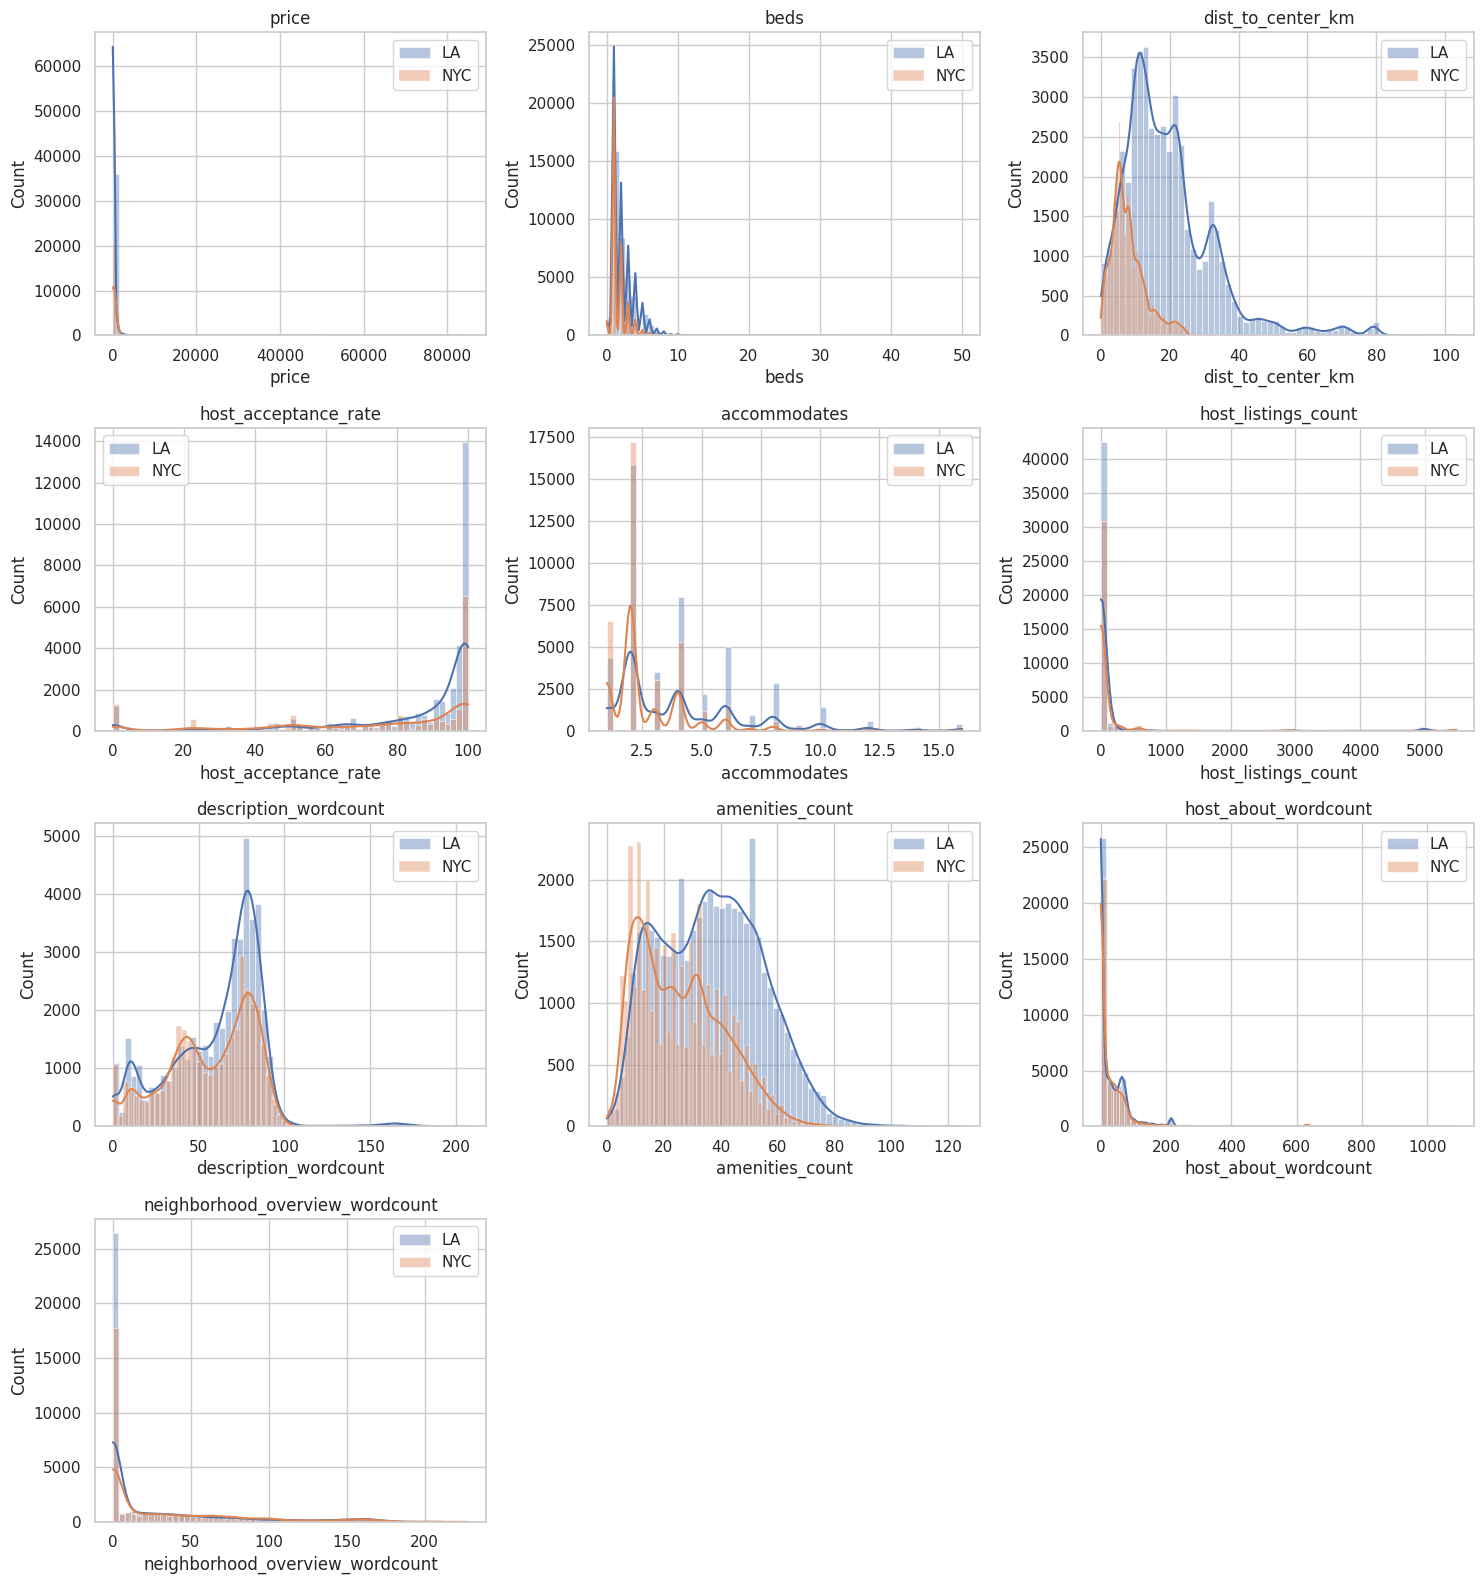

In [56]:
plot_distributions_multi(
    dfs=[la_clean, nyc_clean],
    labels=["LA", "NYC"],
    cols=cols
)


In [57]:

def central_interval(df, cols, coverage=0.95):
    """
    Calculates symmetric percentile-based boundaries for a set of columns.
    By default, it identifies the inner 95% range, effectively flagging the top and bottom 2.5% of data as outliers.
    """
    alpha = (1 - coverage) / 2  # e.g. 0.025
    bounds = []
    for col in cols:
        s = pd.to_numeric(df[col], errors="coerce").dropna()
        lo = s.quantile(alpha)
        hi = s.quantile(1 - alpha)
        bounds.append((col, lo, hi))
    return pd.DataFrame(bounds, columns=["col", "low", "high"]).set_index("col")
def drop_outliers_by_bounds(df, bounds_df):
    """
    Filters the DataFrame by keeping only records that fall within the pre-calculated central intervals.
    It utilizes a boolean mask to perform a multi-column sweep, ensuring rows with missing values (NaNs) are preserved.
    """
    mask = pd.Series(True, index=df.index)
    for col, row in bounds_df.iterrows():
        s = pd.to_numeric(df[col], errors="coerce")
        mask &= s.between(row["low"], row["high"]) | s.isna()  # keep NaNs
    return df[mask].copy(), mask


In [58]:
cols=['price','beds','dist_to_center_km','host_acceptance_rate','accommodates','host_listings_count','description_wordcount', 'amenities_count','host_about_wordcount', 'neighborhood_overview_wordcount']

bounds_la=central_interval(la_clean,cols,coverage=.97)
bounds_nyc=central_interval(nyc_clean,cols,coverage=.97)
bounds_nyc_la=central_interval(nyc_la_clean,cols,coverage=.97)
la_trimmed, mask = drop_outliers_by_bounds(la_clean, bounds_la)
nyc_trimmed, mask = drop_outliers_by_bounds(nyc_clean, bounds_nyc)
nyc_la_trimmed, mask = drop_outliers_by_bounds(nyc_la_clean, bounds_nyc_la)

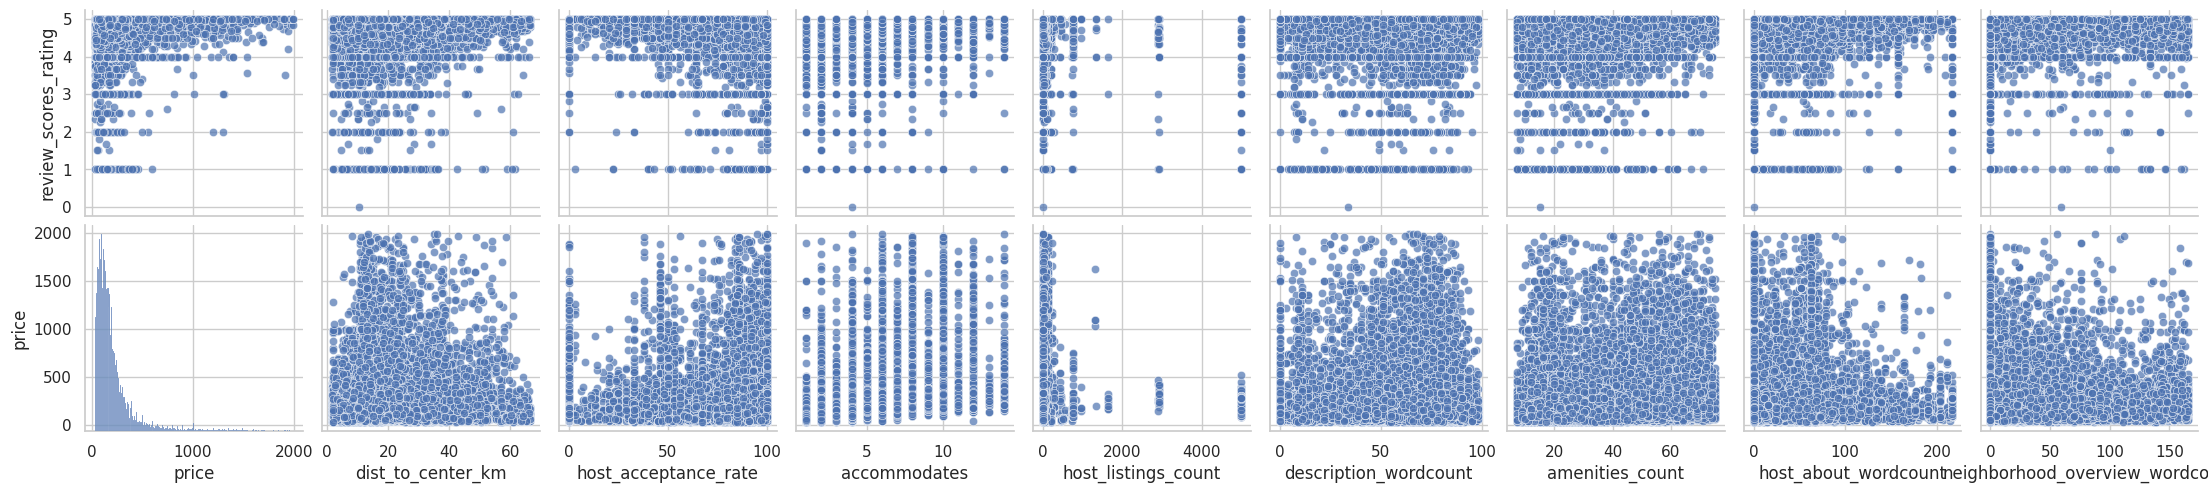

In [59]:
import seaborn as sns
pp=sns.pairplot(data=la_trimmed,
                y_vars=['review_scores_rating','price'],
                x_vars=['price','dist_to_center_km','host_acceptance_rate','accommodates','host_listings_count','description_wordcount', 'amenities_count','host_about_wordcount', 'neighborhood_overview_wordcount'],
                kind='scatter', plot_kws={'color':'b','alpha':0.7})

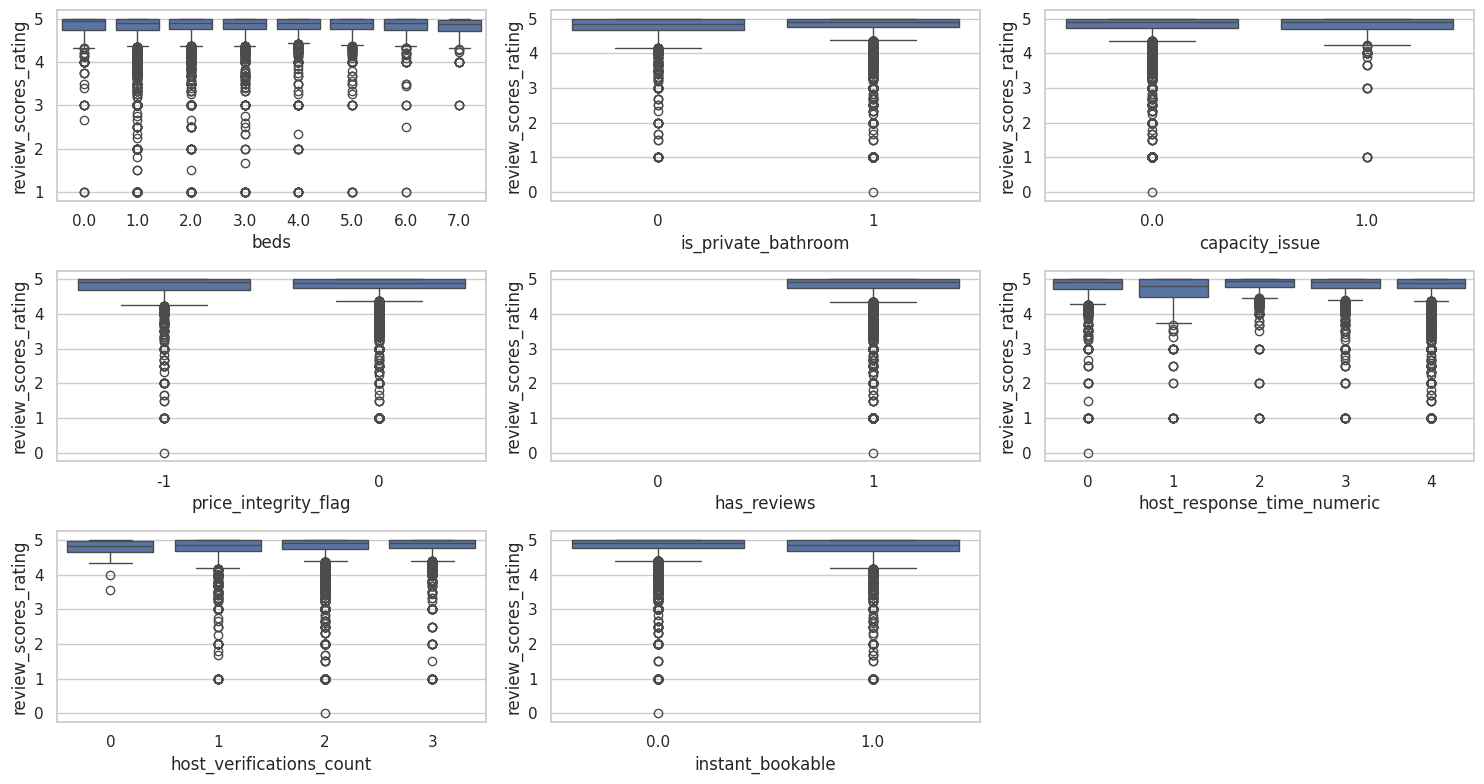

In [60]:
cols = [
    'beds',
    'is_private_bathroom',
    'capacity_issue',
    'price_integrity_flag',
    'has_reviews',
    'host_response_time_numeric',
    'host_verifications_count',
    'instant_bookable'
]
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(15, 8),
    # sharex=True
)

axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.boxplot(
        data=la_trimmed,
        y='review_scores_rating',
        x=col,
        ax=ax
    )
    # ax.set_title(col)

# Hide unused axes
for ax in axes[len(cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [61]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_vs_rating_boxplots_multi(
    dfs,
    labels,
    cols,
    rating_col="review_scores_rating",
    ncols=3
):
    """
    Boxplots of feature vs review score for multiple datasets
    on the same axes using hue.
    """
    n = len(cols)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(5 * ncols, 4 * nrows)
    )

    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        plot_df = []

        for df, label in zip(dfs, labels):
            tmp = df[[col, rating_col]].copy()
            tmp["dataset"] = label
            plot_df.append(tmp)

        plot_df = pd.concat(plot_df, ignore_index=True)

        sns.boxplot(
            data=plot_df,
            x=col,
            y=rating_col,
            hue="dataset",
            ax=ax
        )

        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel("Review Score")
        ax.legend(title="Dataset")

    # Hide unused axes
    for ax in axes[len(cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


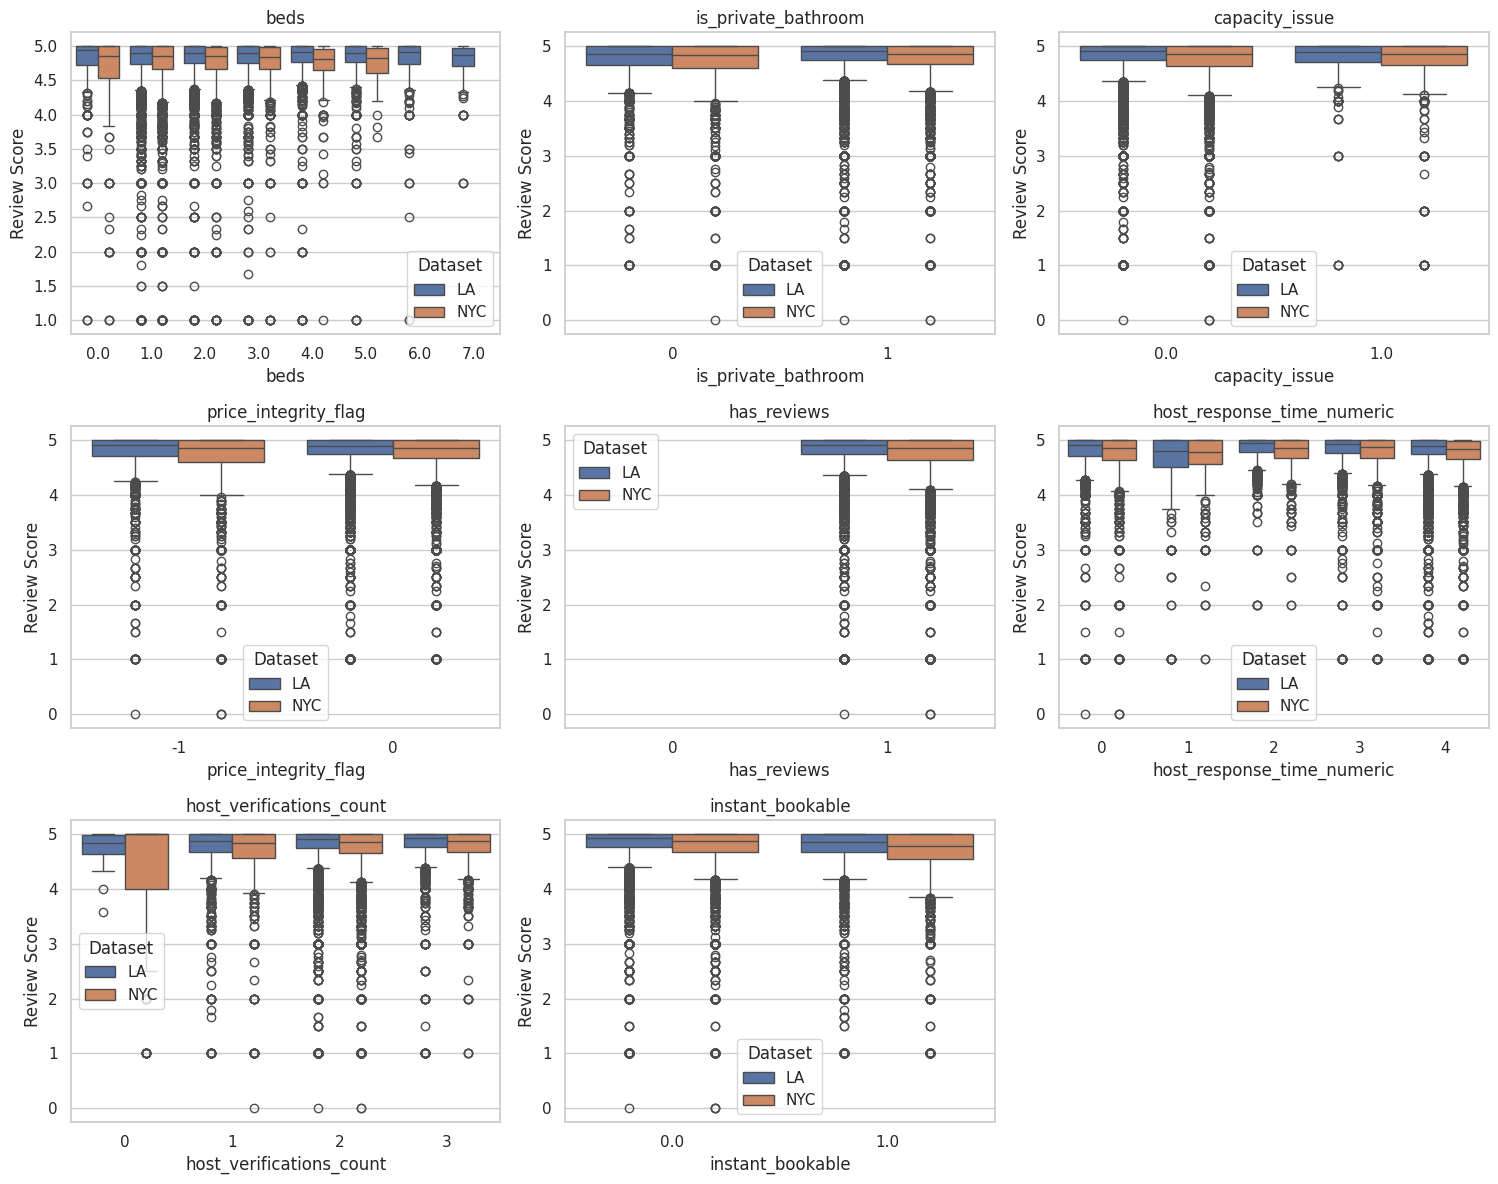

In [62]:
plot_feature_vs_rating_boxplots_multi(
    dfs=[la_trimmed, nyc_trimmed],
    labels=["LA", "NYC"],
    cols=cols
)


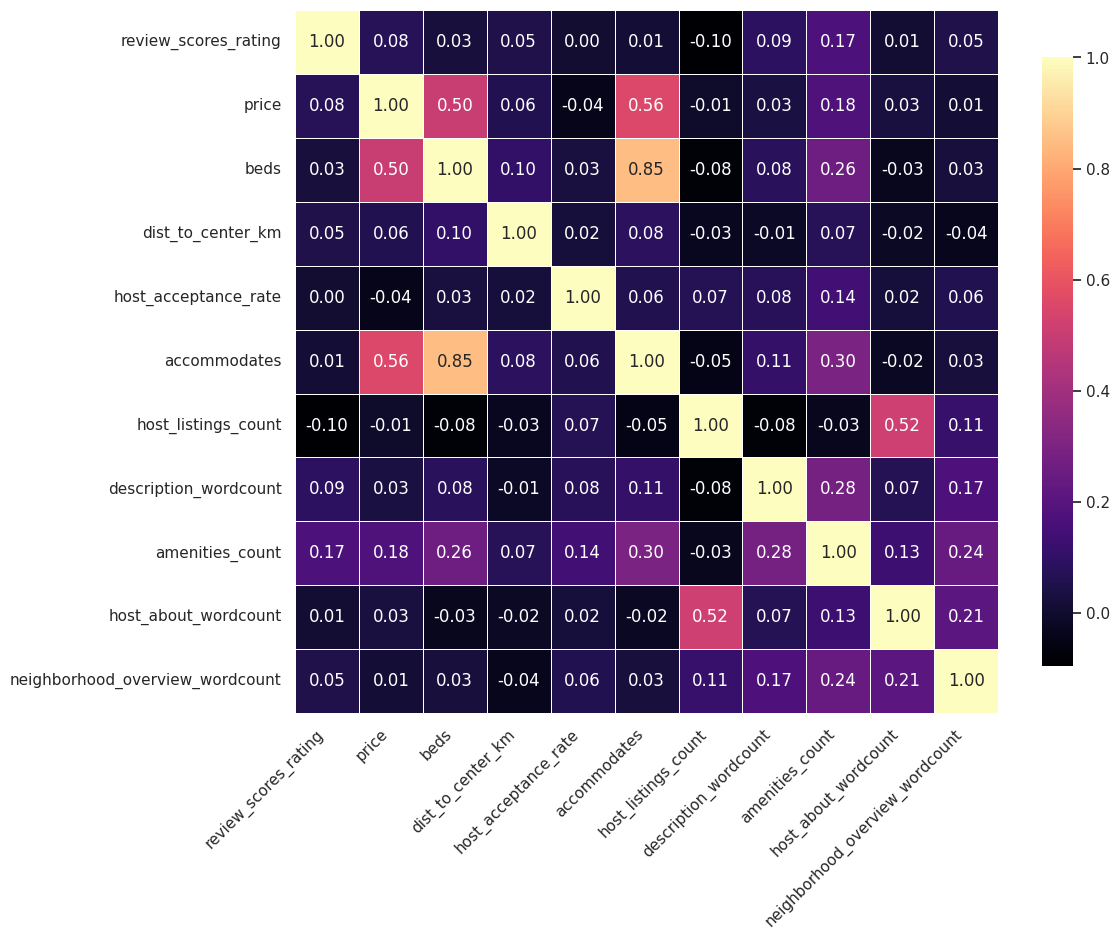

In [63]:
cols=['review_scores_rating','price','beds','dist_to_center_km','host_acceptance_rate','accommodates','host_listings_count','description_wordcount', 'amenities_count','host_about_wordcount', 'neighborhood_overview_wordcount']

corr = la_trimmed[cols].corr()

plt.figure(figsize=(12, 10))  # ⬅️ bigger canvas
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="magma",
    square=True,          # ⬅️ nicer cell shape
    linewidths=0.5,       # ⬅️ spacing between cells
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()        # ⬅️ reduces clipping
plt.show()

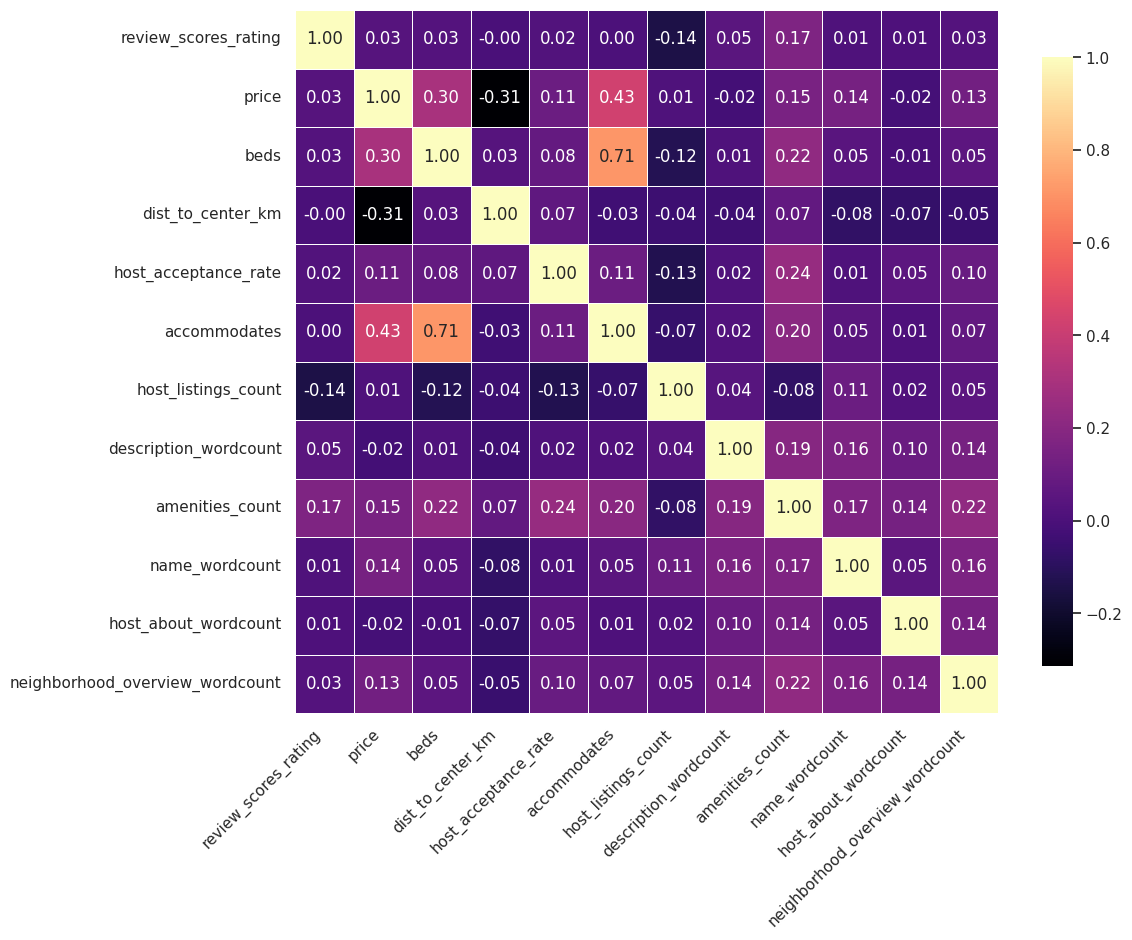

In [64]:
cols=['review_scores_rating','price','beds','dist_to_center_km','host_acceptance_rate','accommodates','host_listings_count','description_wordcount', 'amenities_count','name_wordcount','host_about_wordcount', 'neighborhood_overview_wordcount']

corr = nyc_trimmed[cols].corr()

plt.figure(figsize=(12, 10))  # ⬅️ bigger canvas
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="magma",
    square=True,          # ⬅️ nicer cell shape
    linewidths=0.5,       # ⬅️ spacing between cells
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()        # ⬅️ reduces clipping
plt.show()

Some similarities are noticeable such as name_wordcount has a correlation with price and host listings,and description , i think it's because longer name suggests a company

In [65]:
def plot_col_vs_col(df1,df2, col,check_col='review_scores_rating'):
  fig, ax = plt.subplots(figsize=(8, 5))

  (
      df1
      .groupby(col)[check_col]
      .mean()
      .sort_index()
      .plot(ax=ax, label="LA")
  )

  (
      df2
      .groupby(col)[check_col]
      .mean()
      .sort_index()
      .plot(ax=ax, label="NYC")
  )

  ax.set_xlabel(f"Average {col}")
  ax.set_ylabel(f"Average {check_col}")
  ax.set_title(f"Average {check_col} vs {col}")
  ax.legend()

  plt.tight_layout()
  plt.show()

## Does having longer description result in higher review?

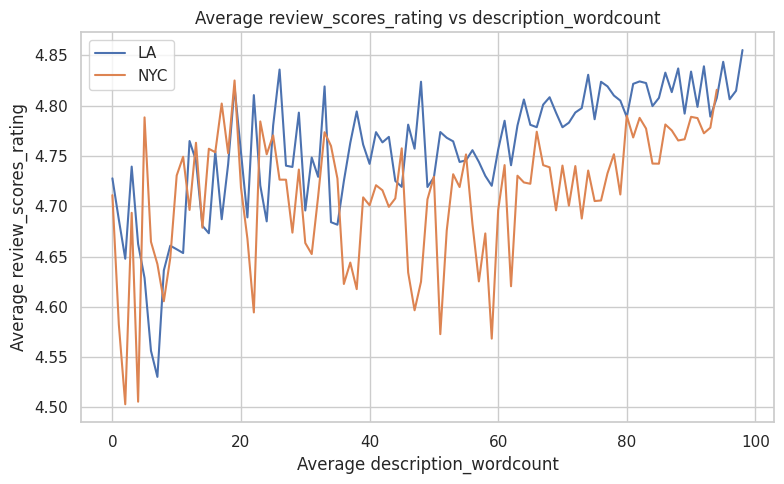

In [66]:
plot_col_vs_col(la_trimmed,nyc_trimmed,'description_wordcount')

As we can see there is a small 0.15 rise for number of words vs review for la and another smaller rise for NYC

Does the price affect the review?


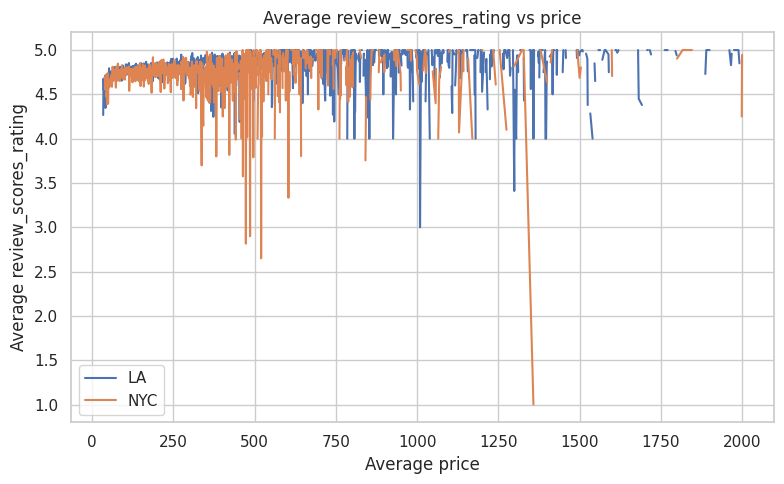

In [67]:
plot_col_vs_col(la_trimmed,nyc_trimmed,'price')

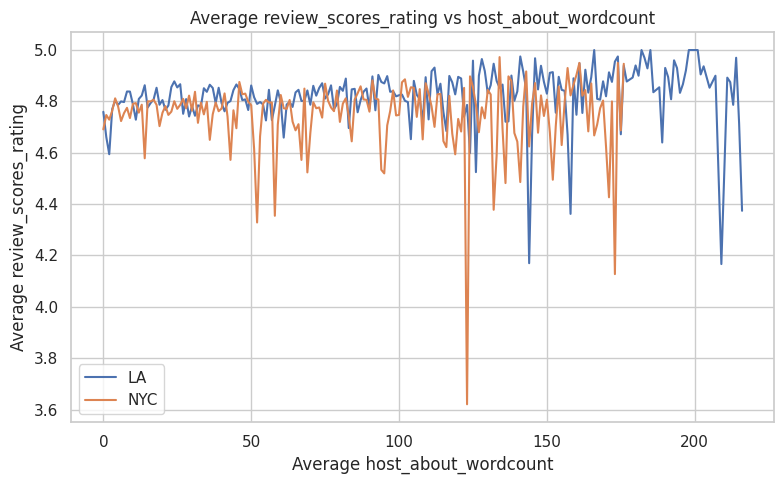

In [68]:
plot_col_vs_col(la_trimmed,nyc_trimmed,'host_about_wordcount')

# Does any of the text features affect price?

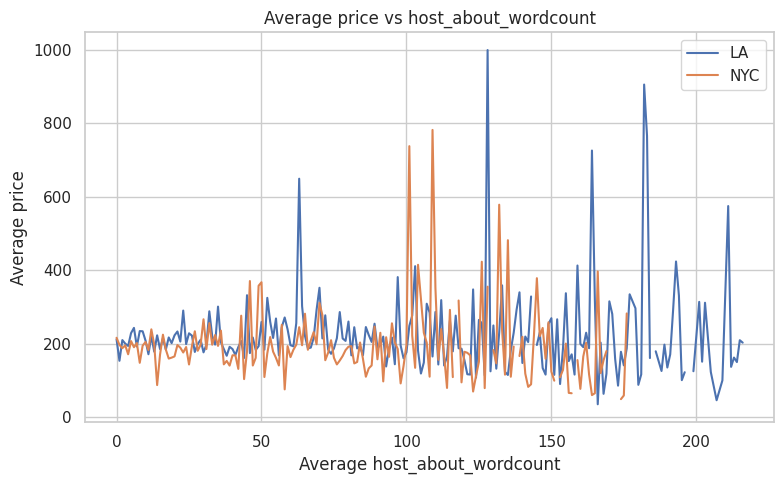

In [69]:
plot_col_vs_col(la_trimmed,nyc_trimmed,'host_about_wordcount','price')

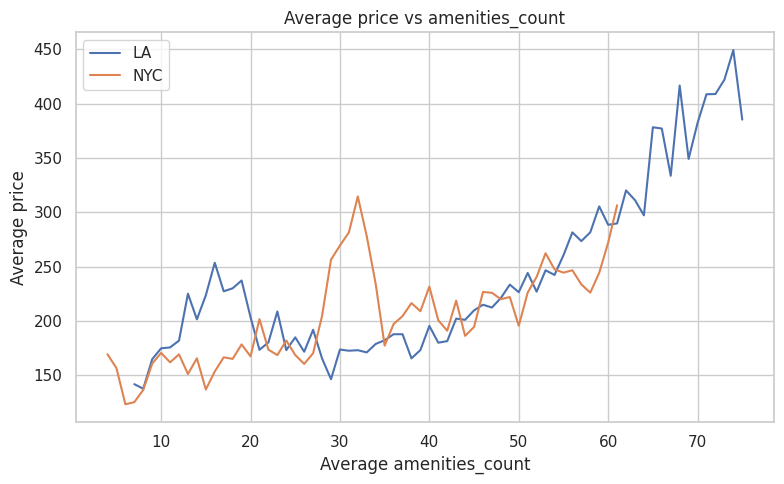

In [70]:
plot_col_vs_col(la_trimmed,nyc_trimmed,'amenities_count','price')

It would seem that amenities count affect the price

### Do the number of ameneties affect the review?

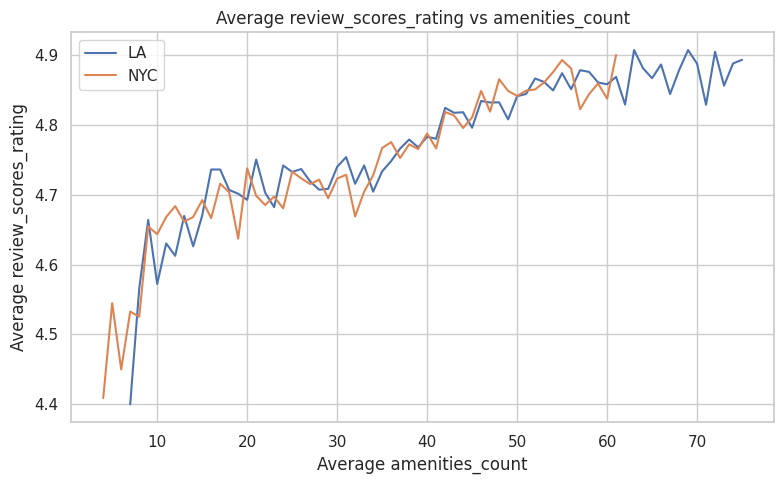

In [71]:
plot_col_vs_col(la_trimmed,nyc_trimmed,'amenities_count')


It would seems that the number of ameneties do affect it


### Does the wordcount of the neighbrhood overview affects the review?


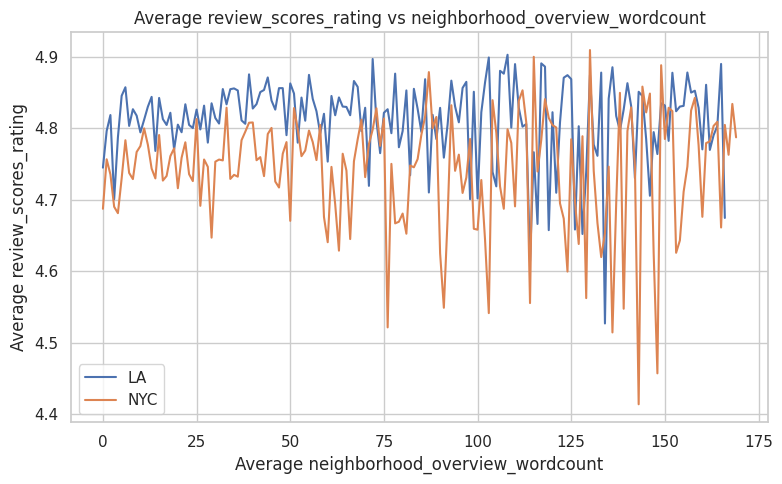

In [72]:
plot_col_vs_col(la_trimmed,nyc_trimmed,'neighborhood_overview_wordcount')


It does not seem to have an affect

In [73]:
nyc_la_trimmed.groupby(['is_private_bathroom','city'])['price'].mean()

is_private_bathroom  city
0                    la       76.615632
                     nyc      92.624201
1                    la      229.822672
                     nyc     243.235117
Name: price, dtype: float64

It does look like if the bathrooms are shared, then it will affect the price

In [74]:
nyc_la_trimmed.groupby(['is_private_bathroom','city'])['review_scores_rating'].mean()

is_private_bathroom  city
0                    la      4.716380
                     nyc     4.687238
1                    la      4.788078
                     nyc     4.735843
Name: review_scores_rating, dtype: float64

However it does not seems to affect the rating


# Model Training!!

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
nyc_la = nyc_la_clean.dropna(subset=["review_scores_rating"])

In [77]:

nyc_la_encoded = pd.get_dummies(
    nyc_la,
    columns=["city"],
    drop_first=True  # drops one category (binary)
)

nyc_la_numeric = nyc_la_encoded.select_dtypes(include="number")

X = nyc_la_numeric.drop(columns=["review_scores_rating"])
y = nyc_la_numeric["review_scores_rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [78]:
hgb = HistGradientBoostingRegressor(
    early_stopping=True,
    random_state=42
)

param_grid = {
    "learning_rate": [0.03, 0.05, 0.1],
    "max_leaf_nodes": [15, 31, 63],
    "min_samples_leaf": [10, 20, 50],
    "l2_regularization": [0.0, 0.1, 0.5]
}

grid = GridSearchCV(
    estimator=hgb,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=HistGradientBoostingRegressor(early_stopping=True,
                                                     random_state=42),
             n_jobs=-1,
             param_grid={'l2_regularization': [0.0, 0.1, 0.5],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'max_leaf_nodes': [15, 31, 63],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [79]:
grid.best_params_
grid.best_score_
best_model = grid.best_estimator_

In [80]:
y_pred = best_model.predict(X_test)

In [82]:
rmse = mean_squared_error(y_test, y_pred)
print("Test RMSE:", rmse)

Test RMSE: 0.1625848025760821
